**Project Classification**

This project was created to fulfill the mini project requirement of the Digital Skill Fair Data Science 35.0 Bootcamp by Dibimbing.

~ authored by Ketrin Natasya Stefany ([linkedin.com/in/ketrinntsya](https://www.linkedin.com/in/ketrinntsya/))

**Overview**

In this project, the Breast Cancer dataset from scikit-learn was utilized to classify tumors using various machine learning models, including Decision Tree, Random Forest, Logistic Regression, and Naïve Bayes. The primary goal was to identify the best-performing model by evaluating their classification accuracy and other performance metrics. Throughout the process, key steps such as data understanding, preprocessing, exploratory data analysis (EDA), model development, and evaluation were undertaken. This project enhanced my skills in applying machine learning techniques, comparing model performance, and selecting the most effective model for classification tasks.

# Load Dataset

In [1]:
import pandas as pd
from sklearn import datasets

#Memuat dataset wine dari scikit learn dan mengonversinya menjadi Dataframe
datacancer = datasets.load_breast_cancer()

x = datacancer.data  #Inputan untuk machine learning
y = datacancer.target #Output yang diinginkkan dari machine learning

#Mengonversi data fitur dan target menjadi Dataframe
df_x = pd.DataFrame(x, columns=datacancer.feature_names)
df_y = pd.Series(y, name='target')

#Gabungkan fitur dan target dalam satu Dataframe
df = pd.concat([df_x, df_y], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Preprocesing Data

In [2]:
##Informasi tentang Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
#Memeriksa data hilang
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [4]:
#Memeriksa data duplikat
df.duplicated().sum()

0

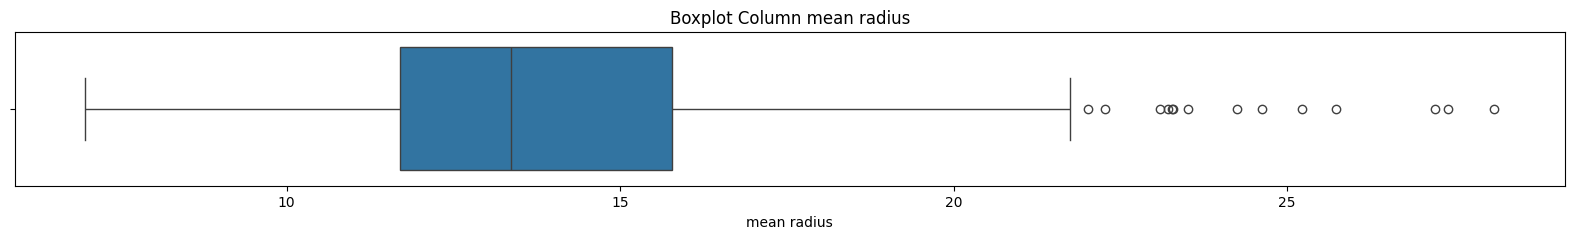

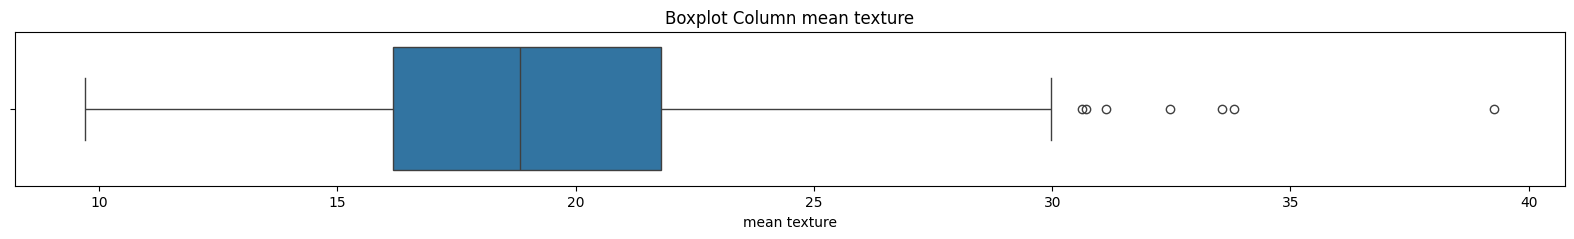

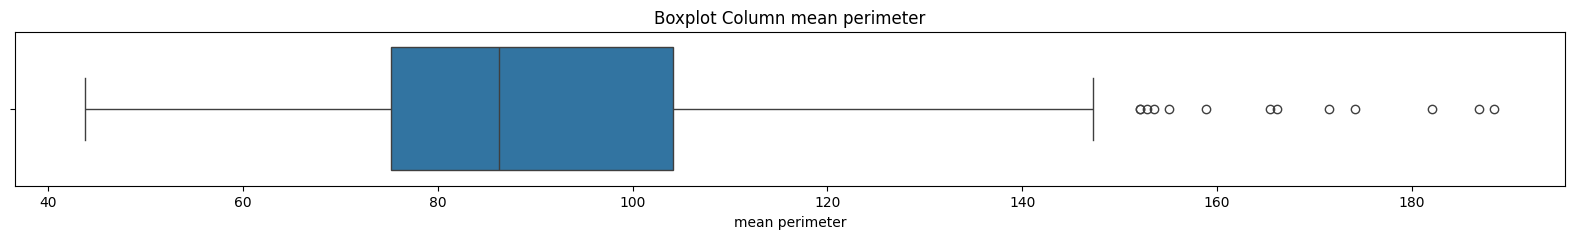

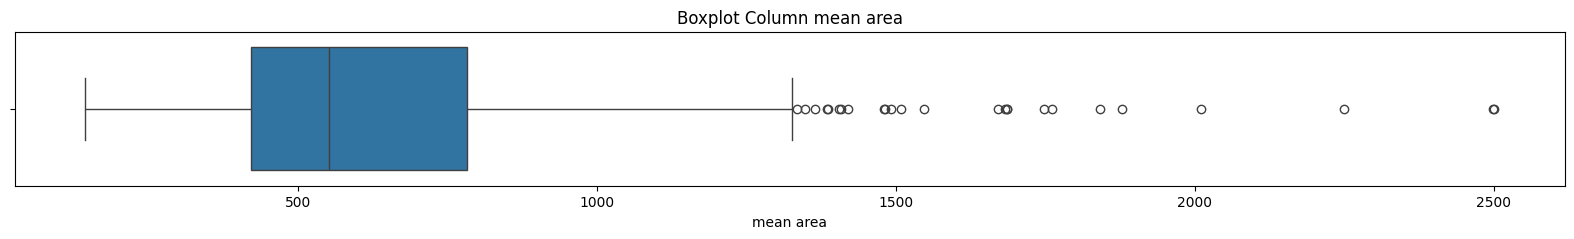

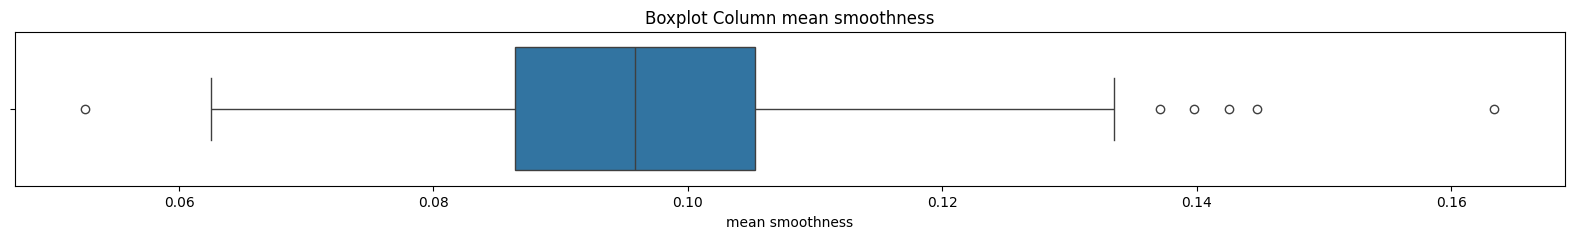

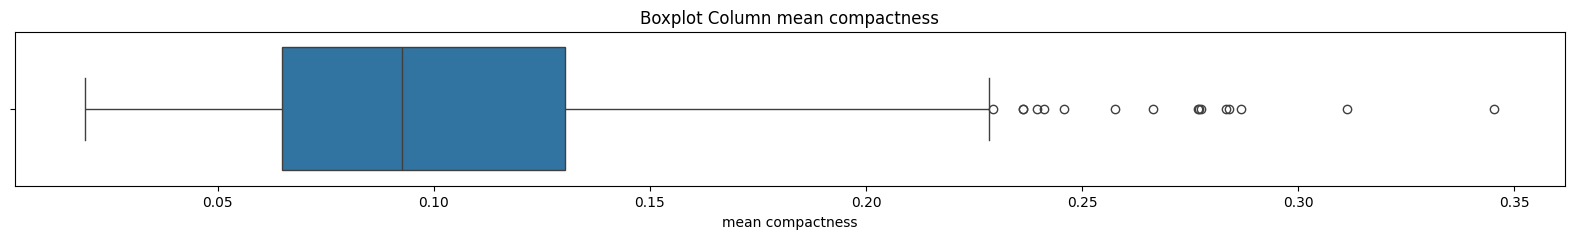

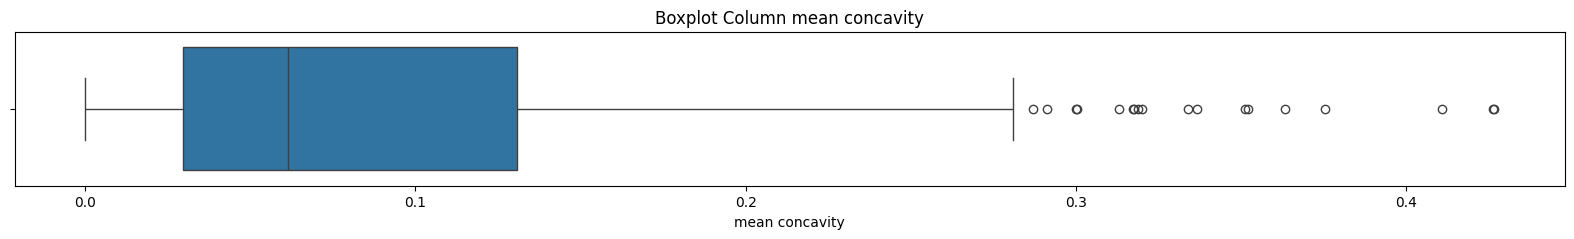

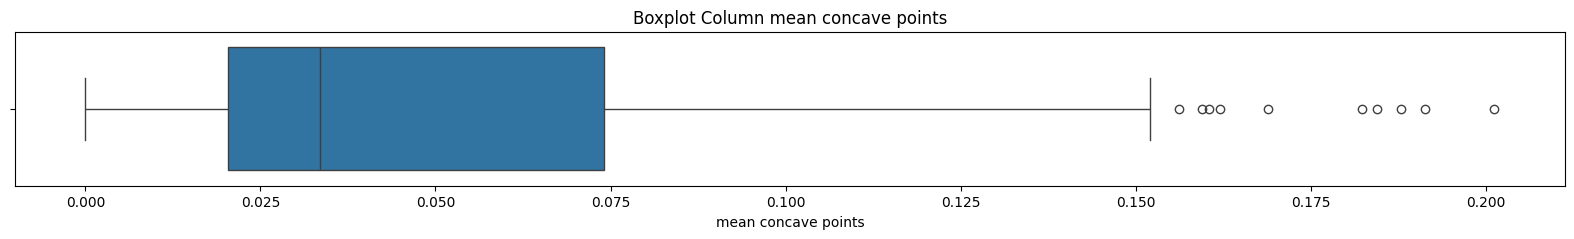

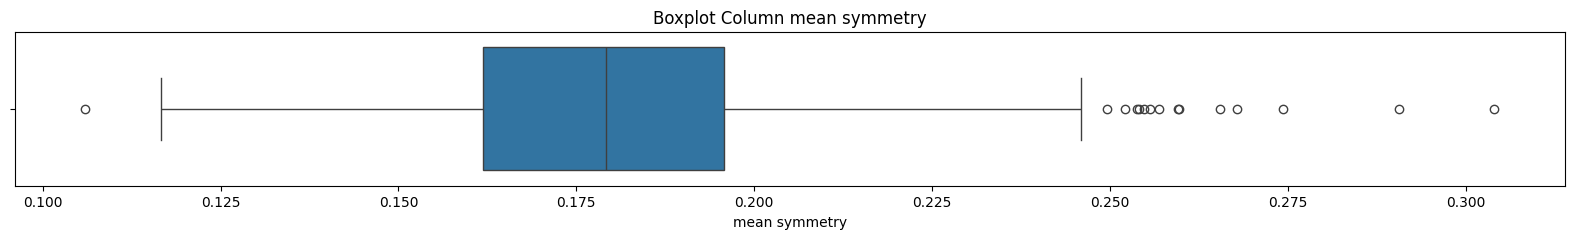

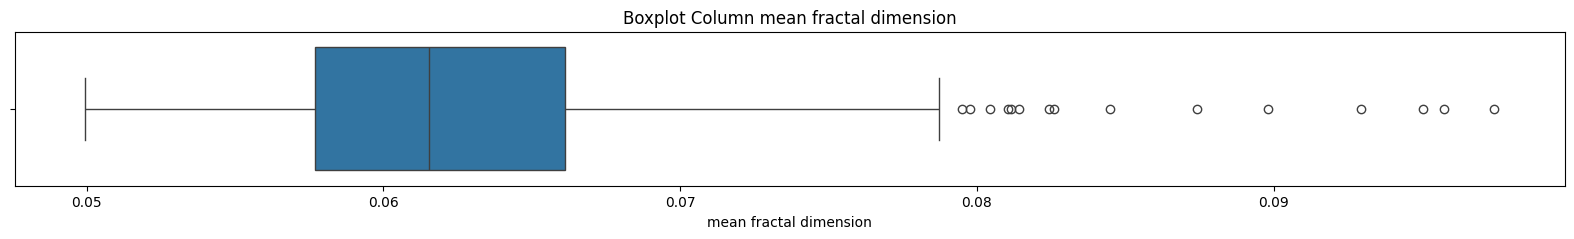

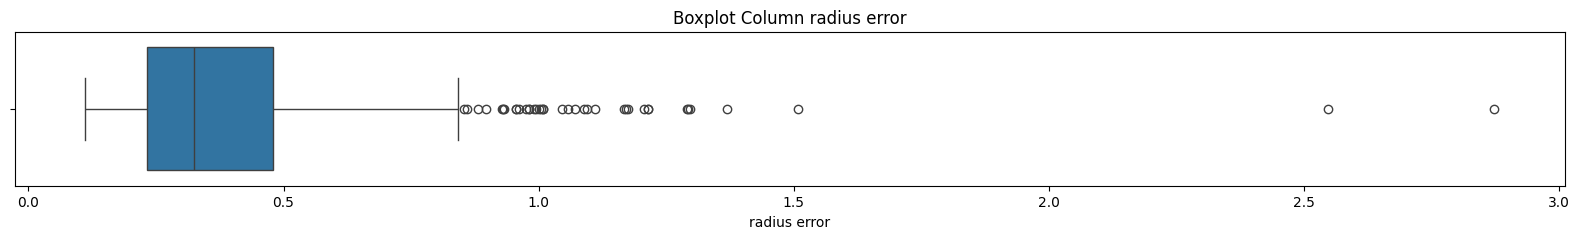

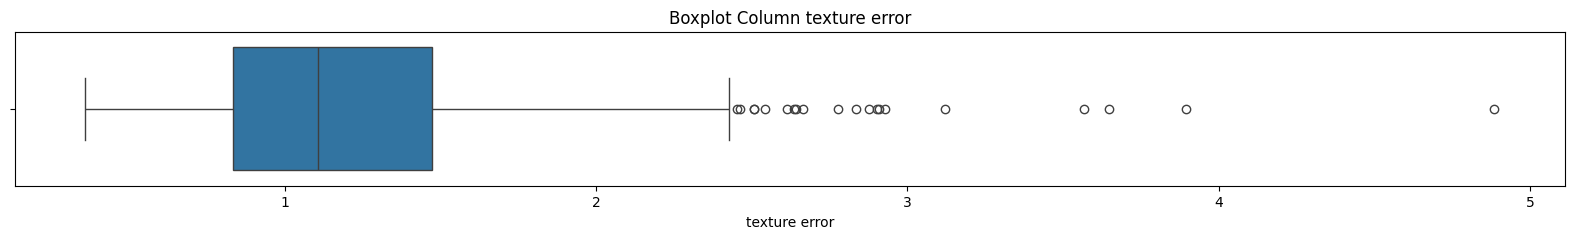

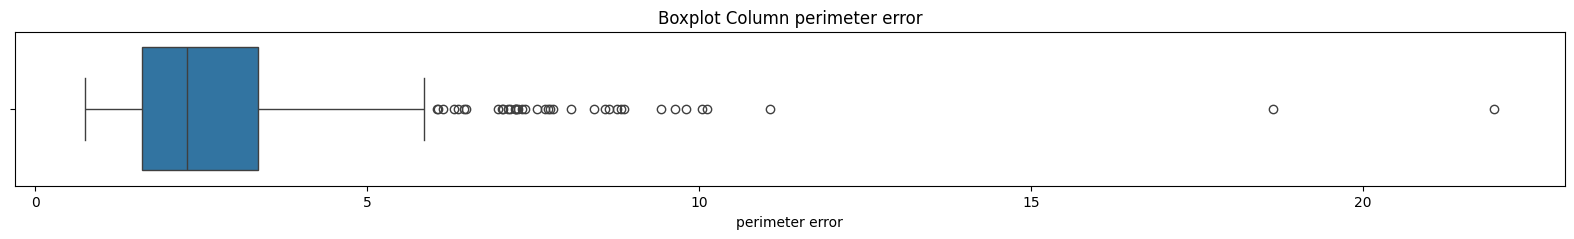

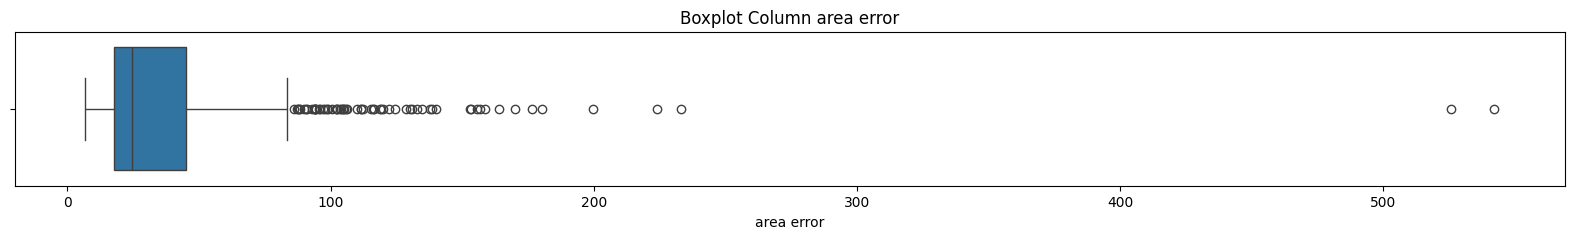

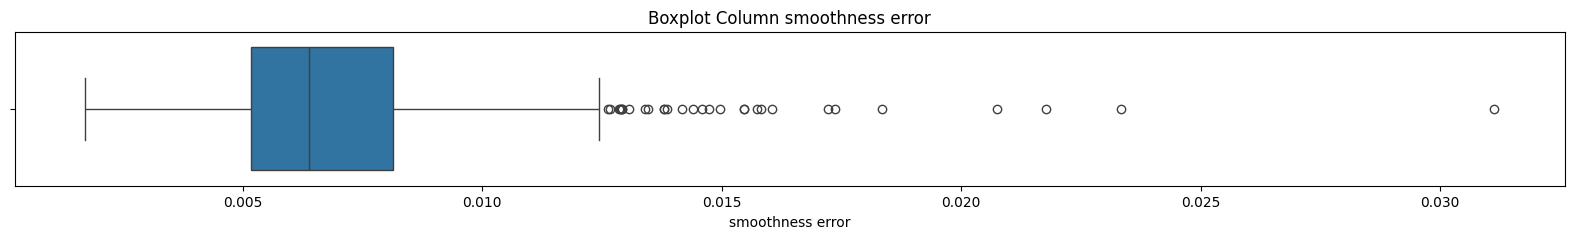

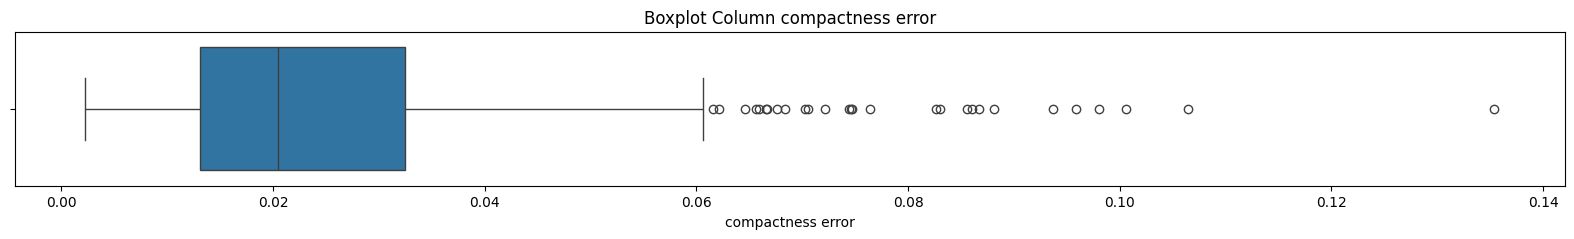

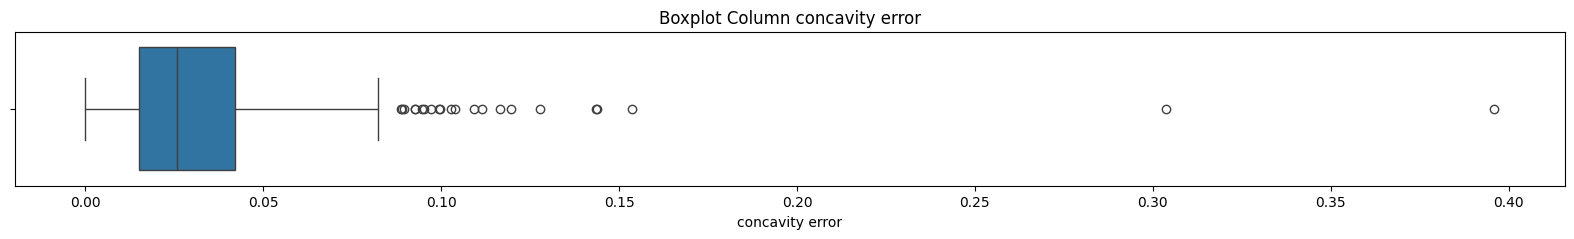

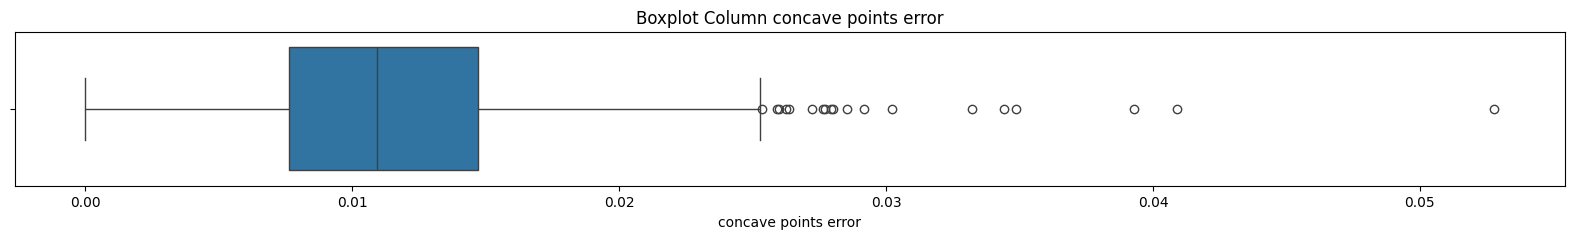

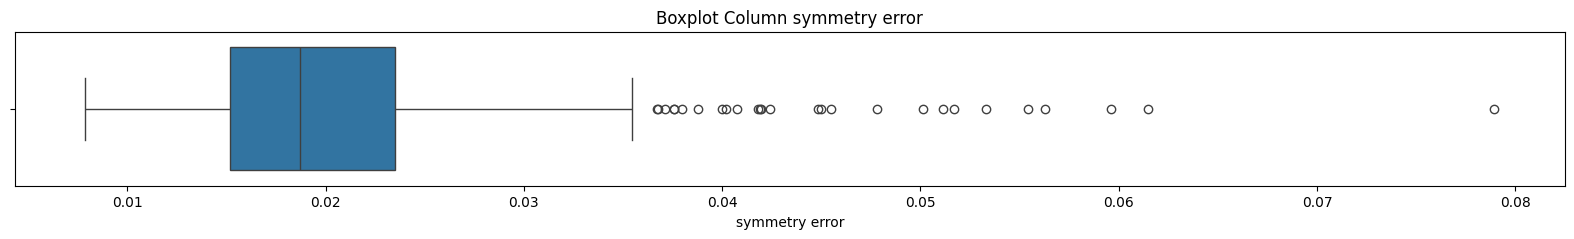

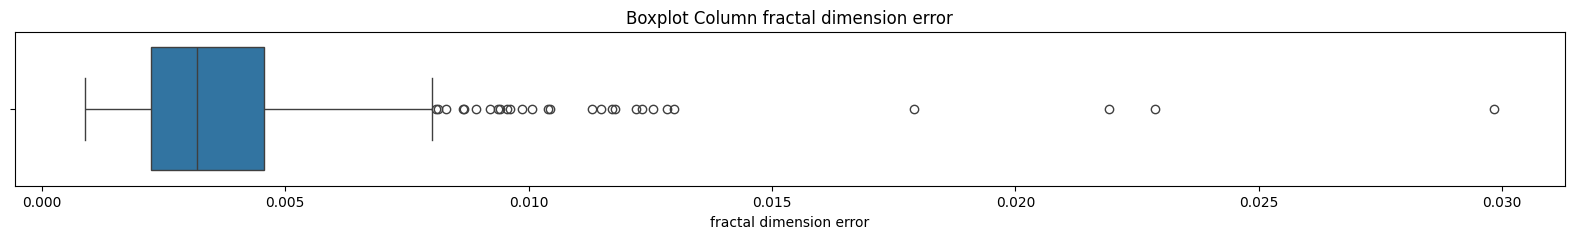

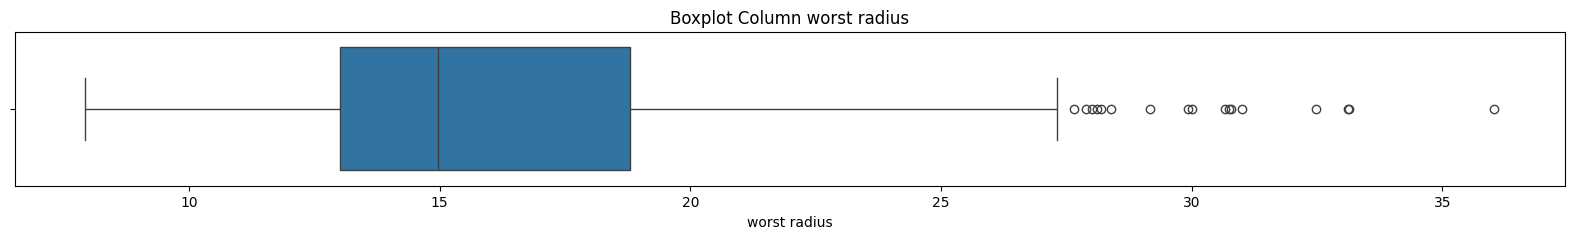

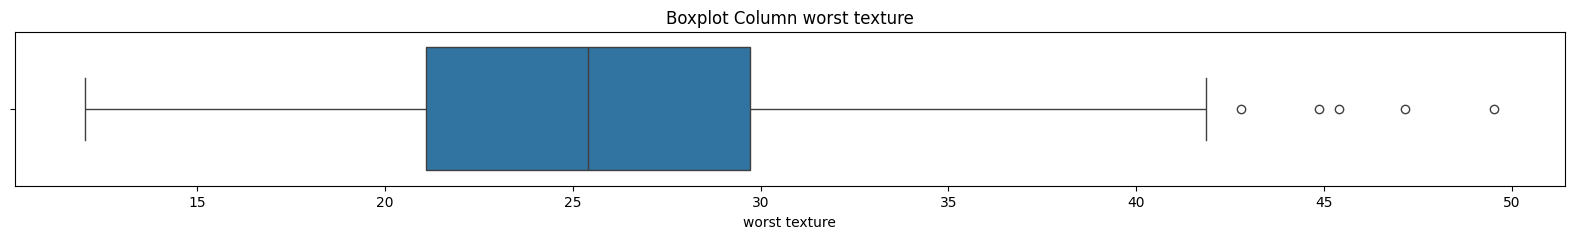

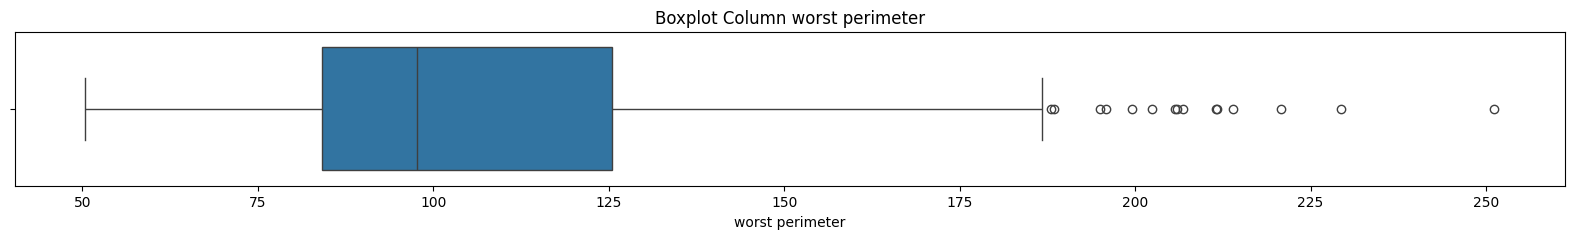

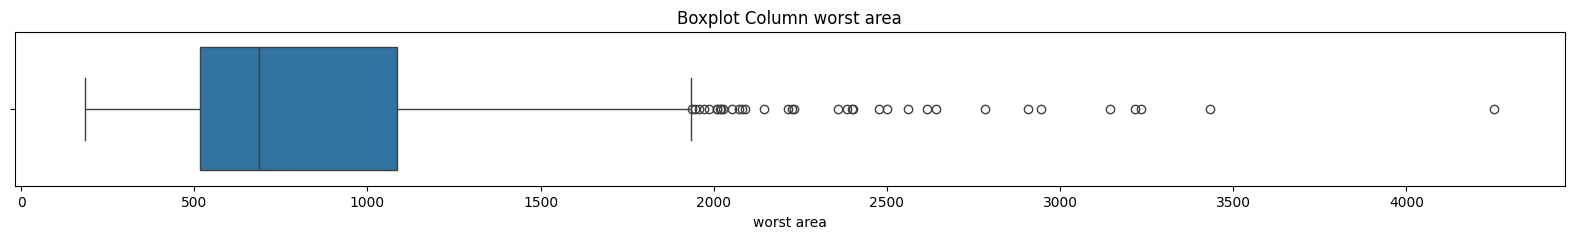

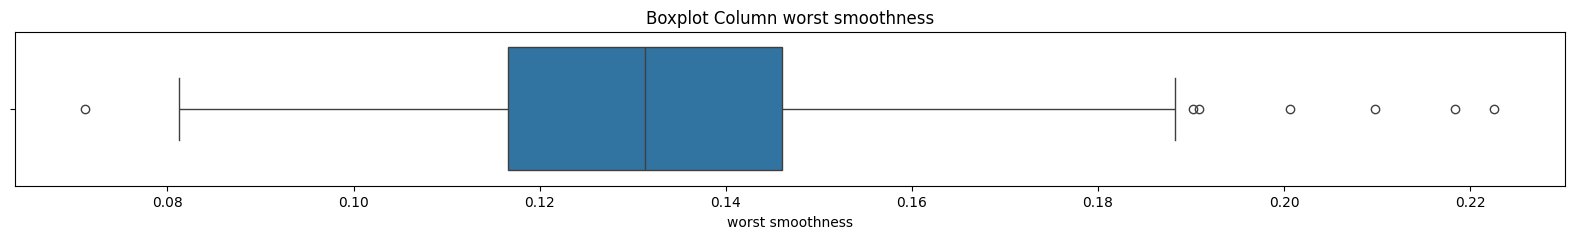

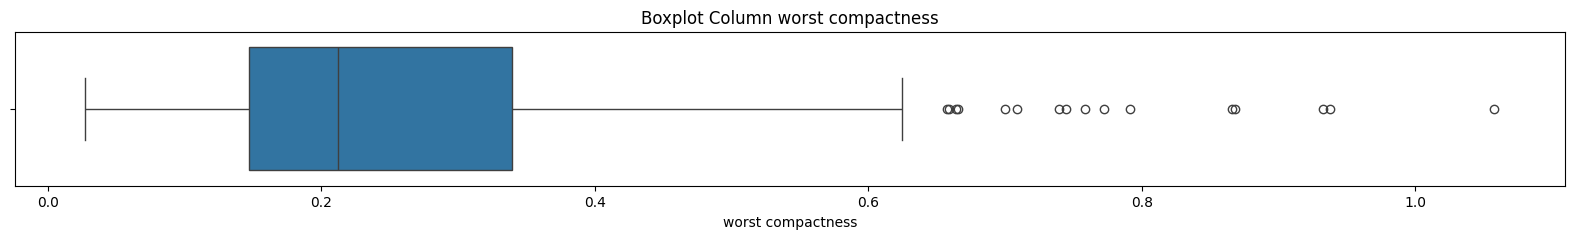

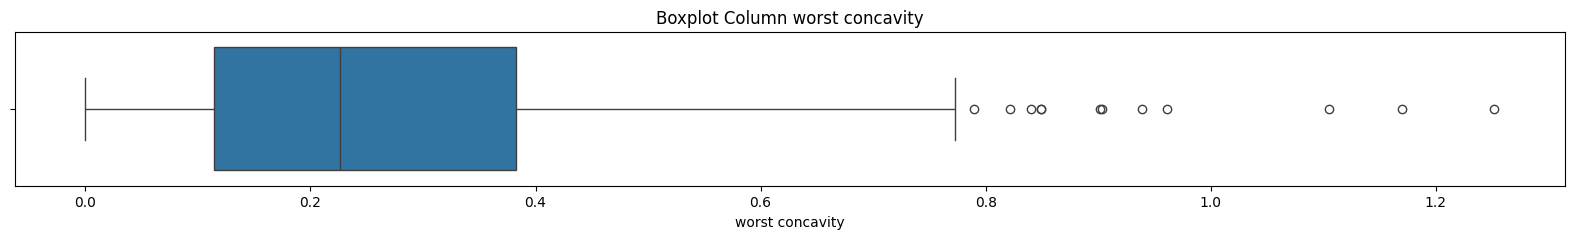

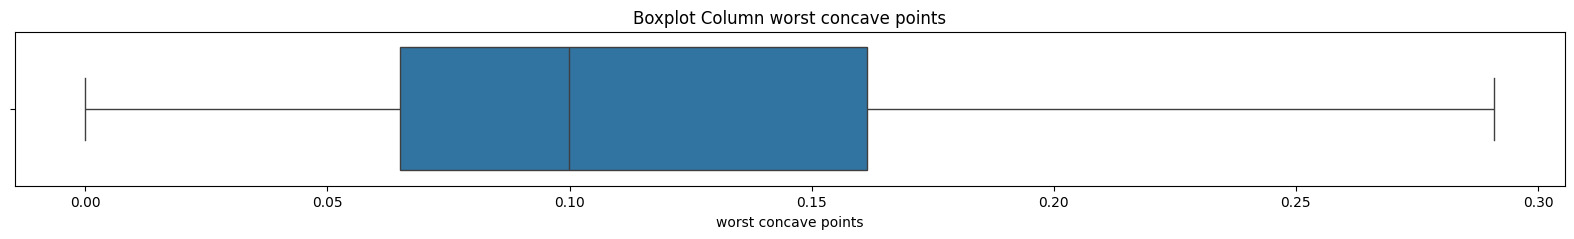

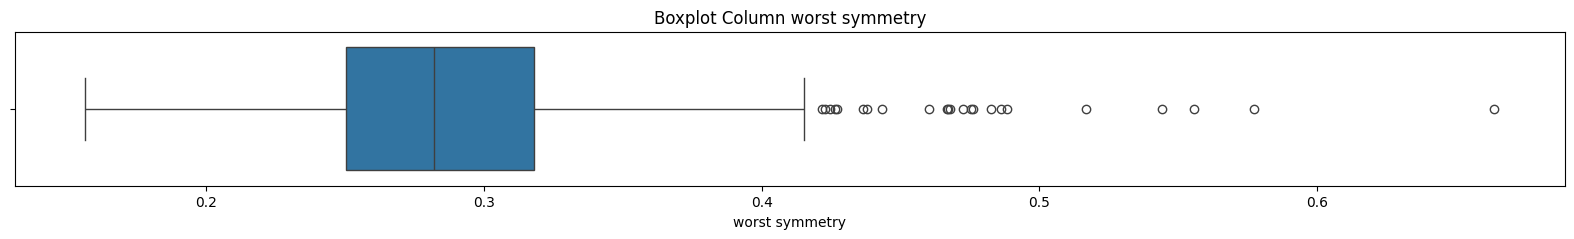

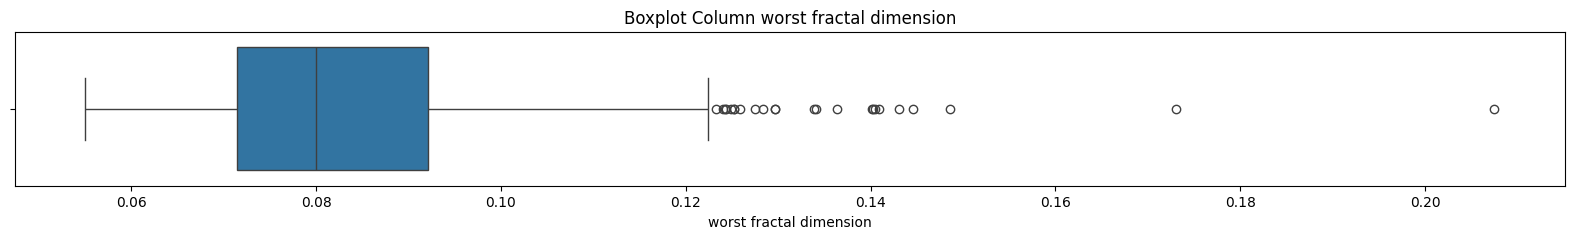

In [5]:
#Memeriksa outlier dengan boxplot
import matplotlib.pyplot as plt
import seaborn as sns
for kol in df_x:
  plt.figure(figsize = (20,2))
  sns.boxplot(df, x=kol)
  plt.title(f"Boxplot Column {kol}")
  plt.show()

In [6]:
#Memeriksa outlier dengan quartil
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

out = (df < lower_bound ) | (df > upper_bound)

for kol in out.columns:
    print (f'kolom  {kol}')
    print (out[kol].value_counts())
    print()

kolom  mean radius
mean radius
False    555
True      14
Name: count, dtype: int64

kolom  mean texture
mean texture
False    562
True       7
Name: count, dtype: int64

kolom  mean perimeter
mean perimeter
False    556
True      13
Name: count, dtype: int64

kolom  mean area
mean area
False    544
True      25
Name: count, dtype: int64

kolom  mean smoothness
mean smoothness
False    563
True       6
Name: count, dtype: int64

kolom  mean compactness
mean compactness
False    553
True      16
Name: count, dtype: int64

kolom  mean concavity
mean concavity
False    551
True      18
Name: count, dtype: int64

kolom  mean concave points
mean concave points
False    559
True      10
Name: count, dtype: int64

kolom  mean symmetry
mean symmetry
False    554
True      15
Name: count, dtype: int64

kolom  mean fractal dimension
mean fractal dimension
False    554
True      15
Name: count, dtype: int64

kolom  radius error
radius error
False    531
True      38
Name: count, dtype: int64

kolo

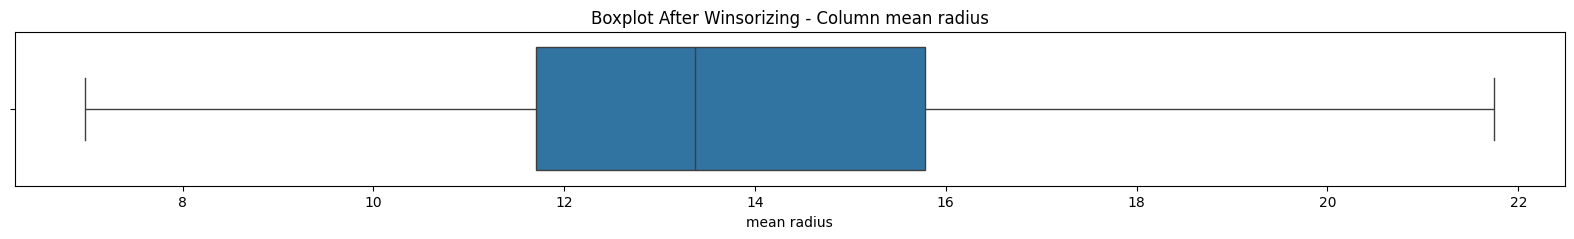

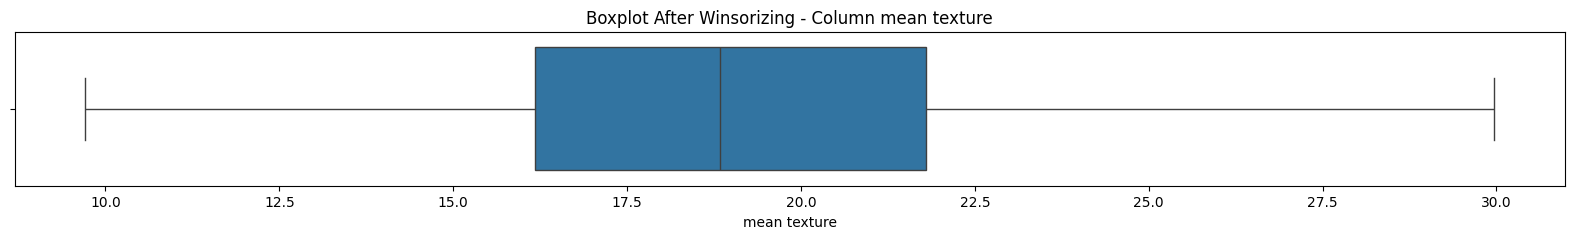

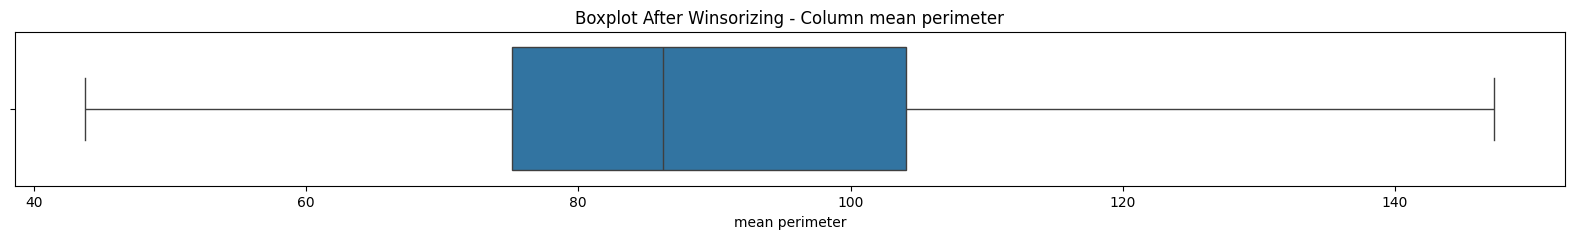

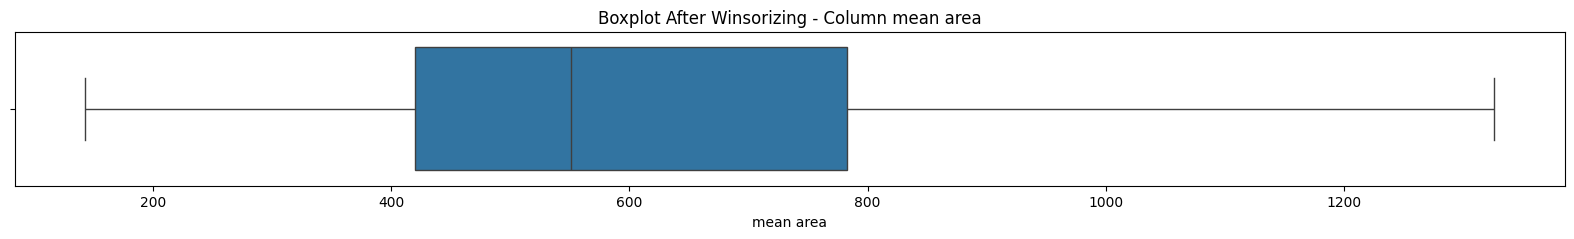

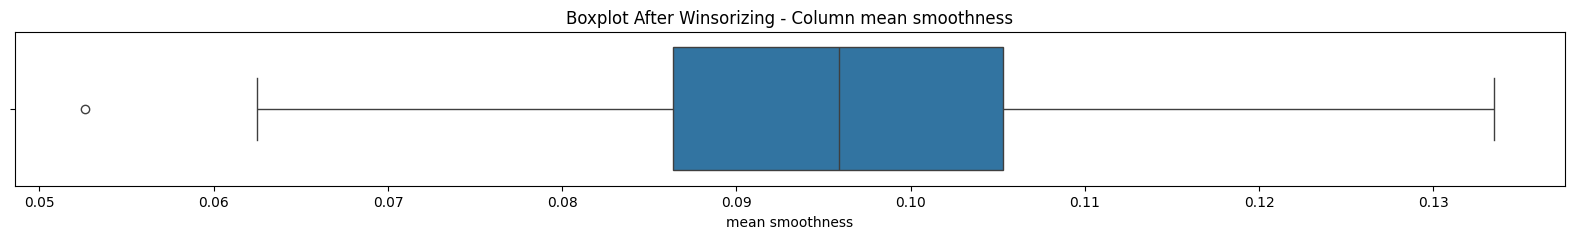

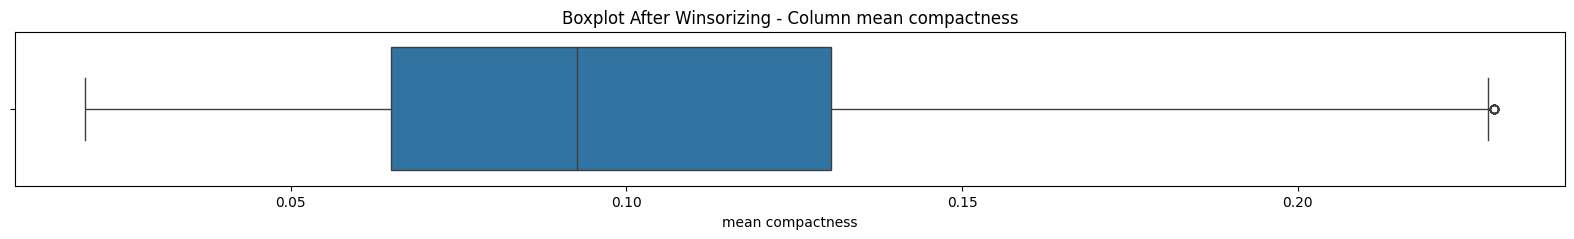

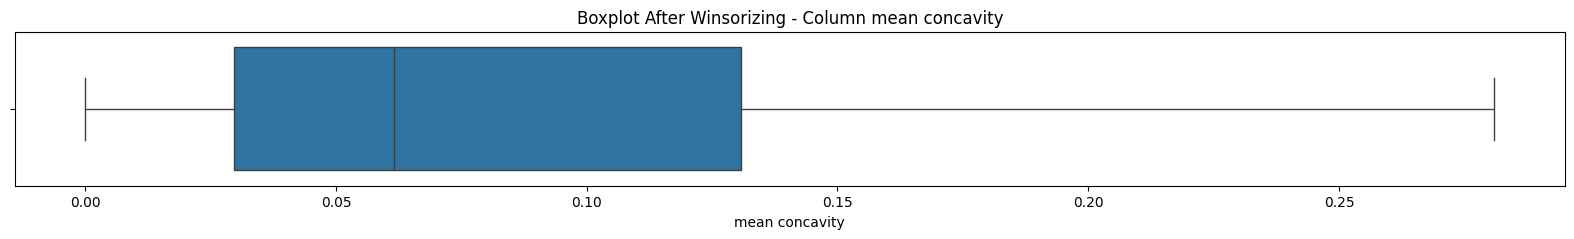

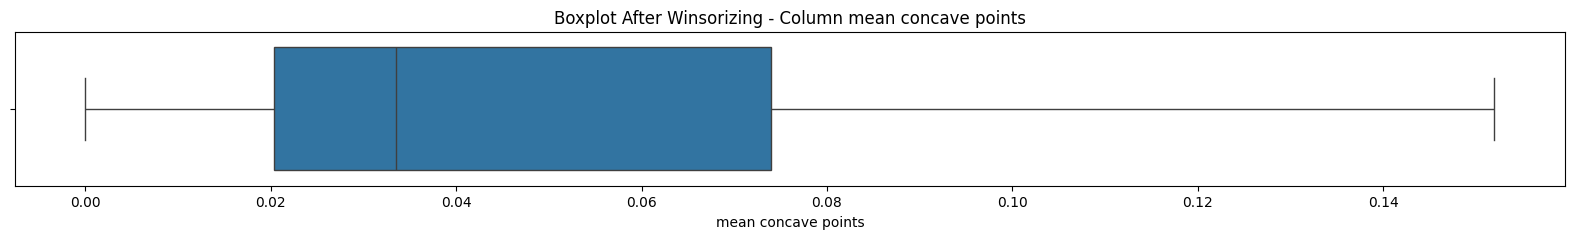

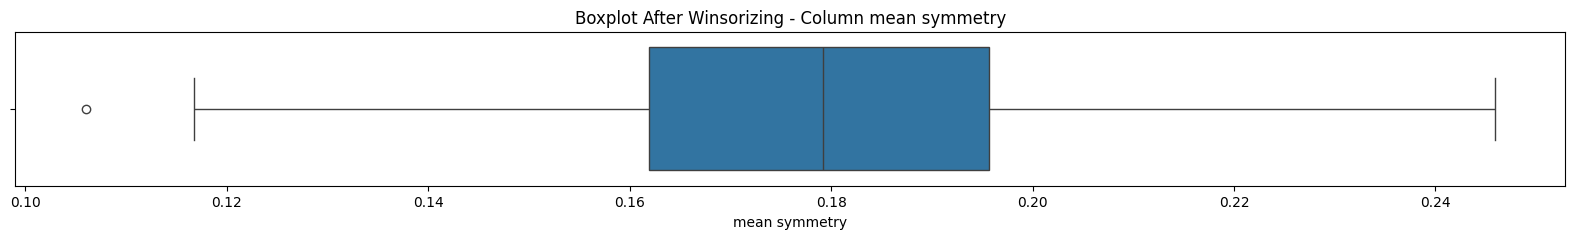

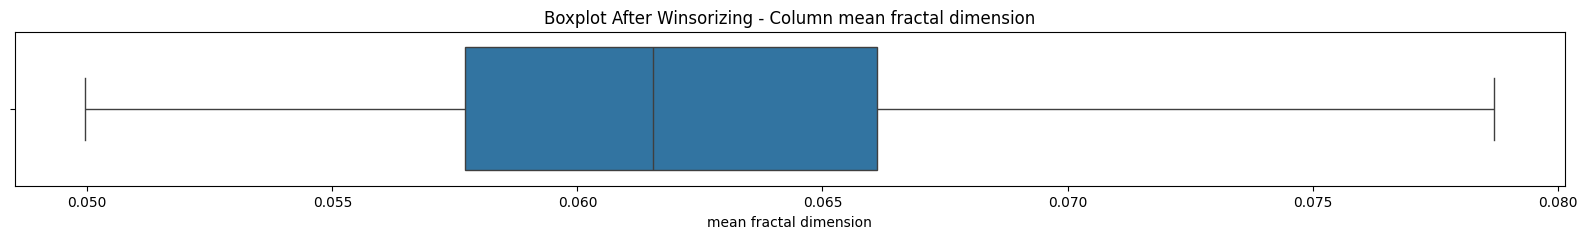

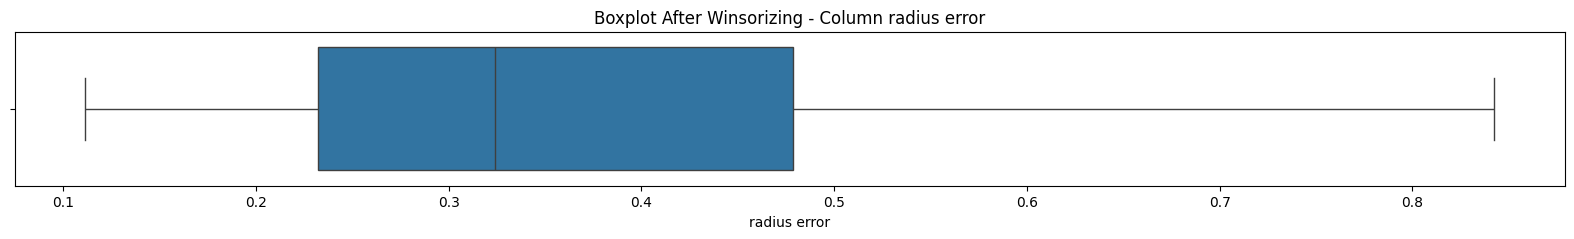

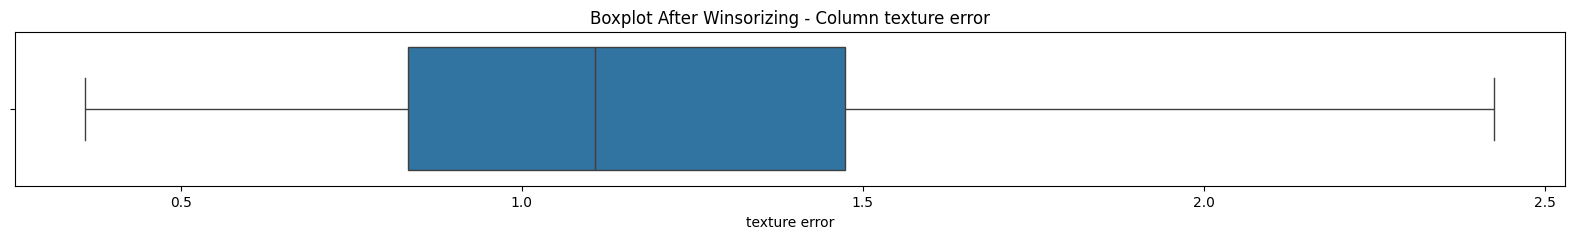

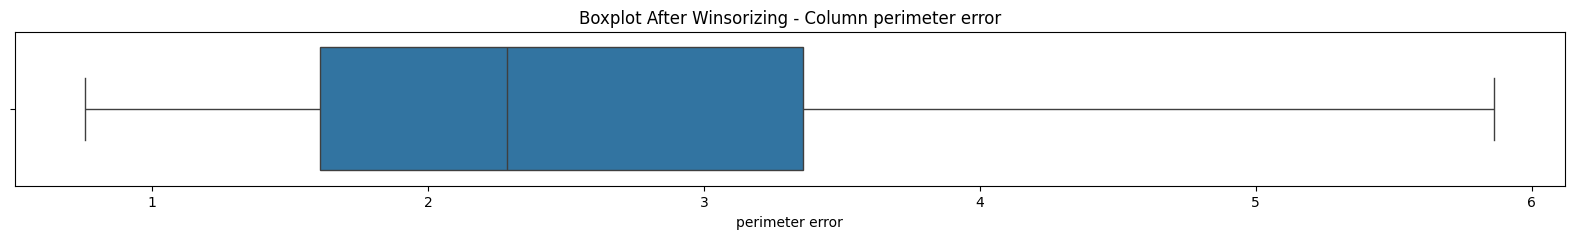

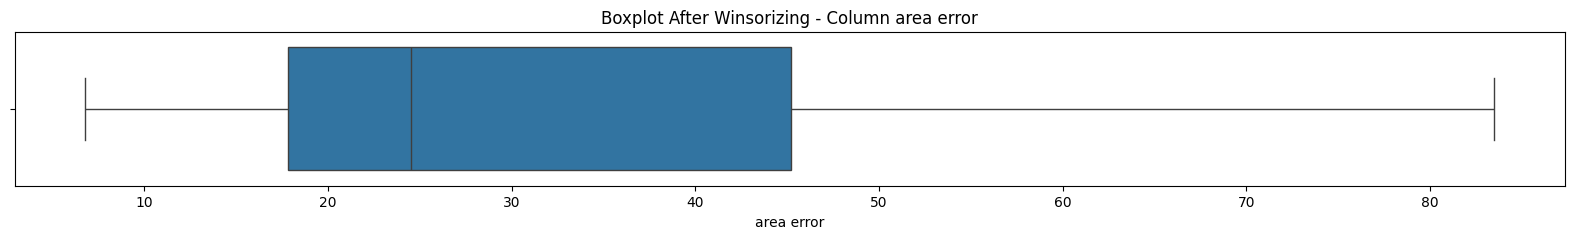

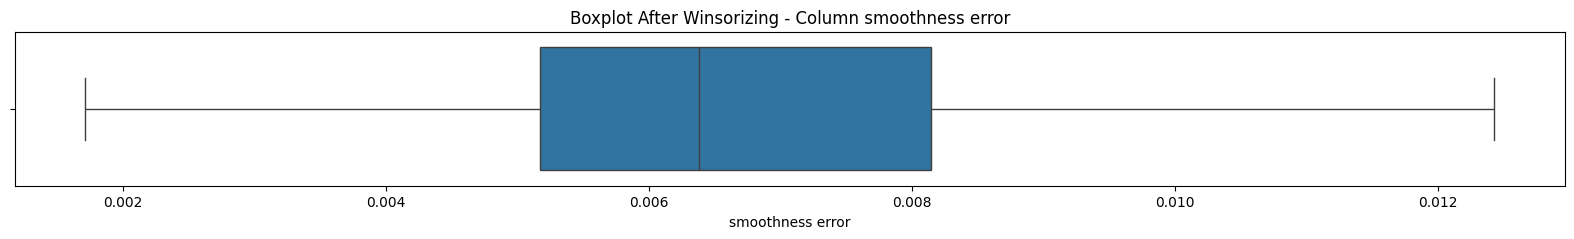

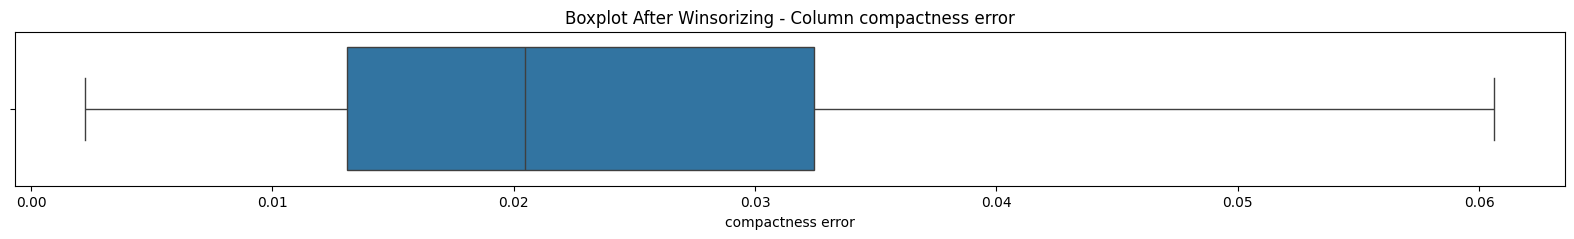

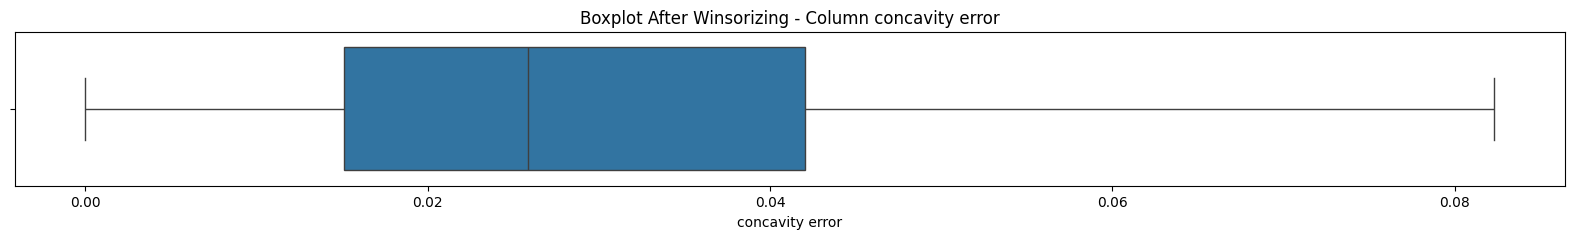

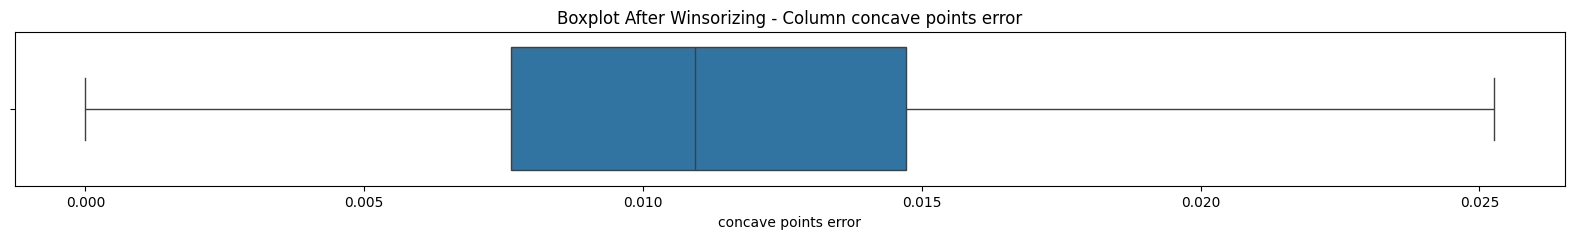

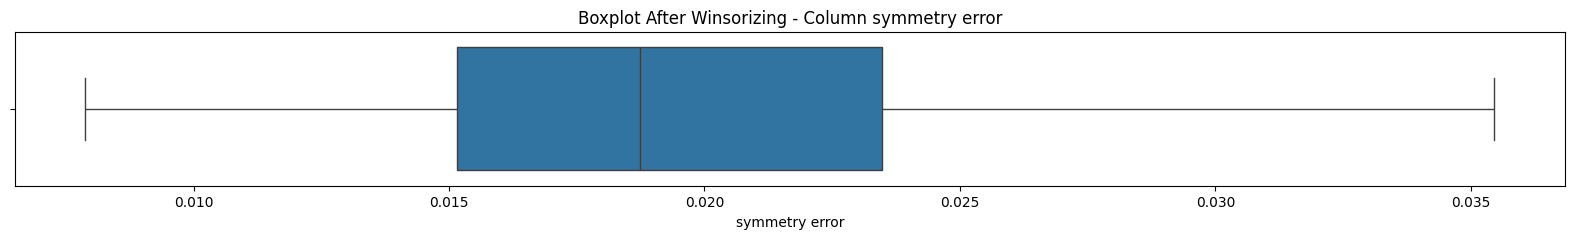

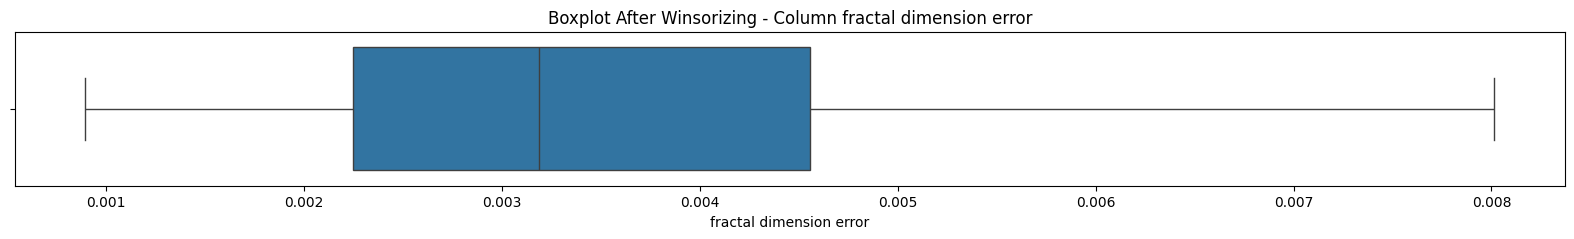

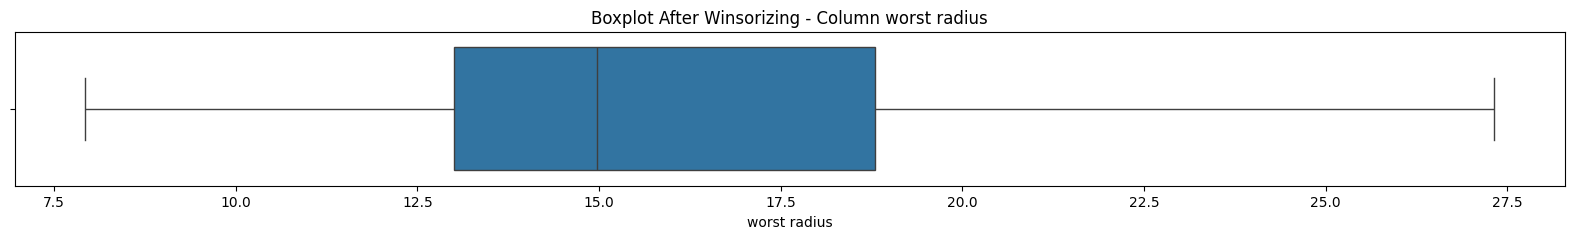

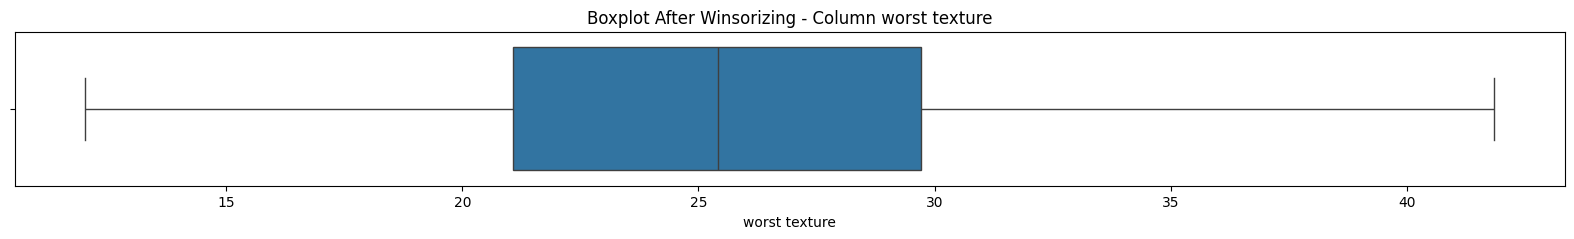

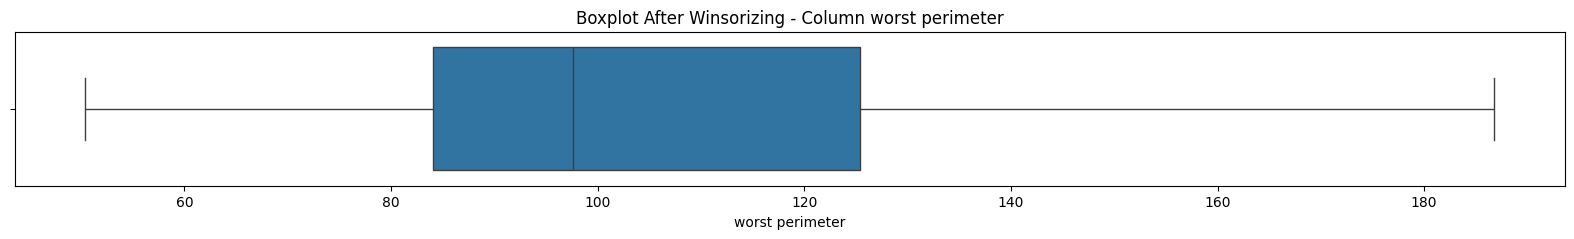

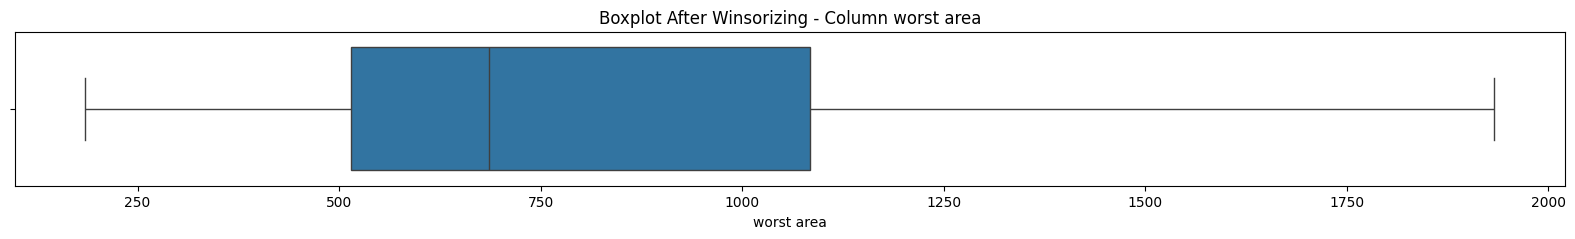

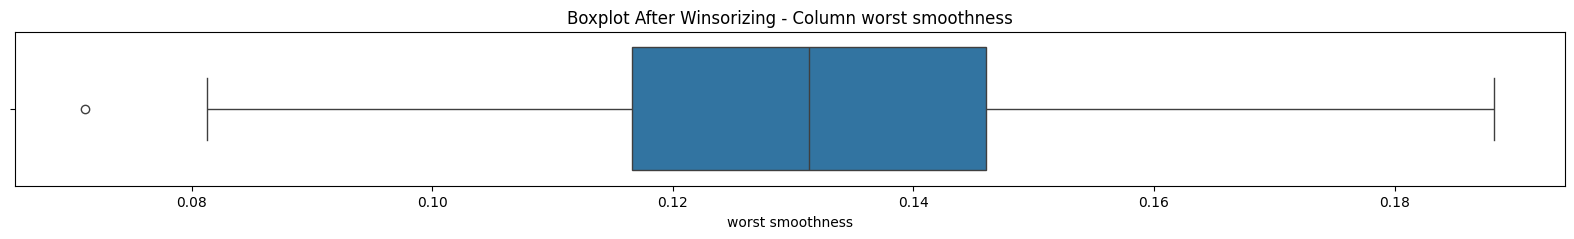

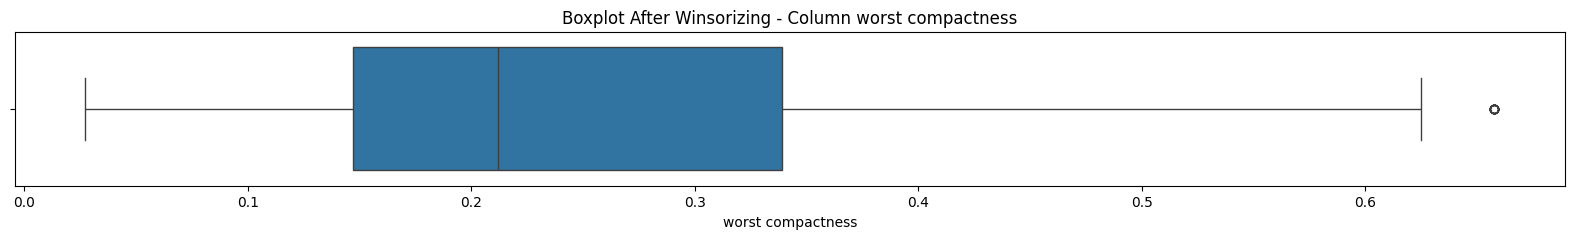

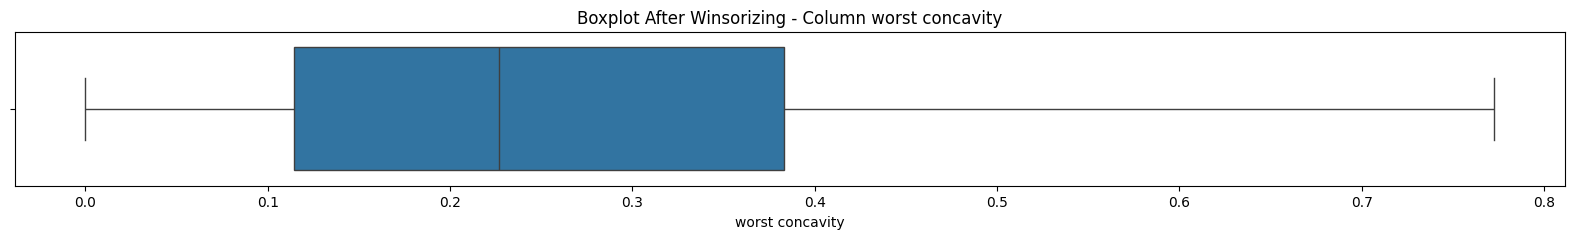

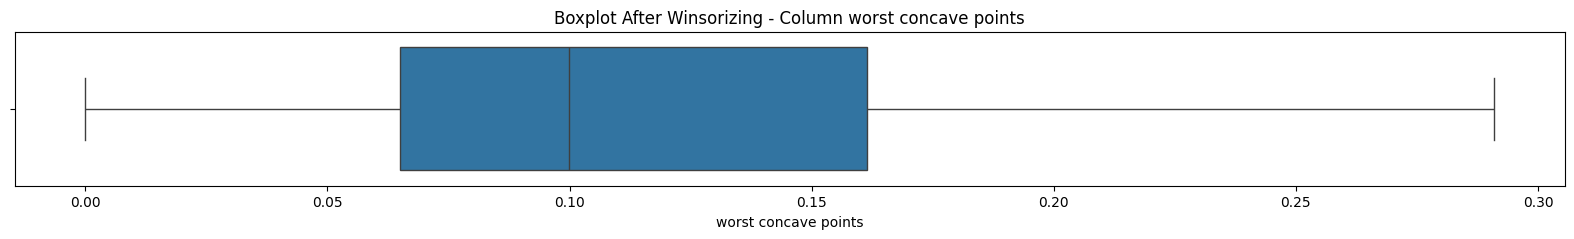

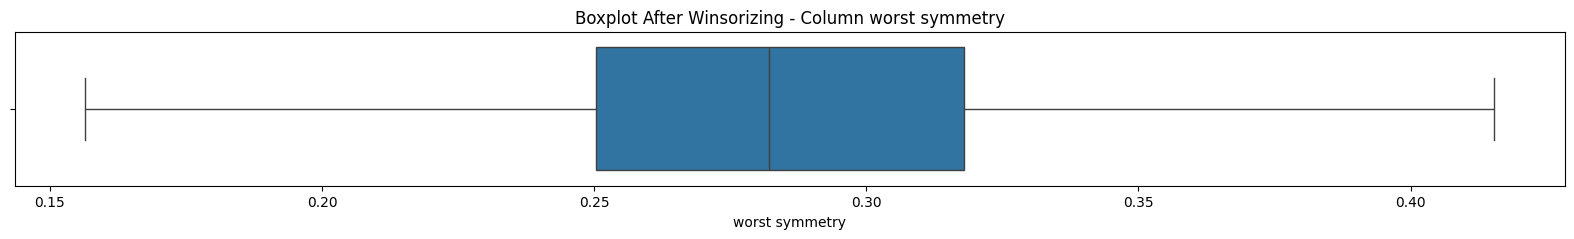

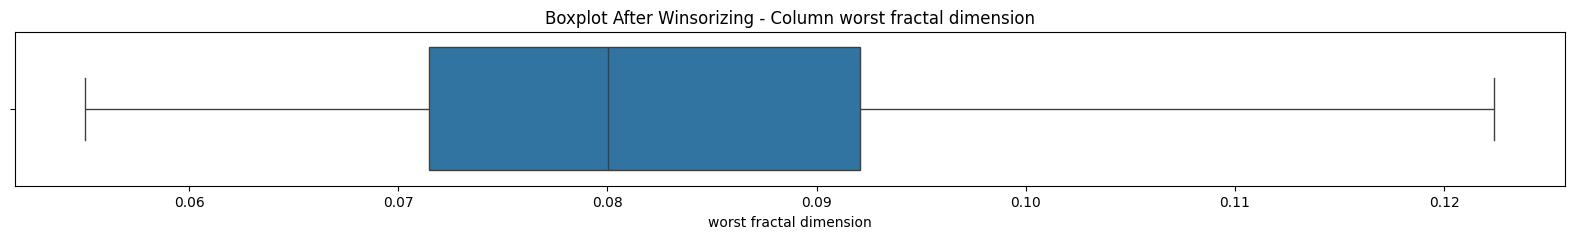

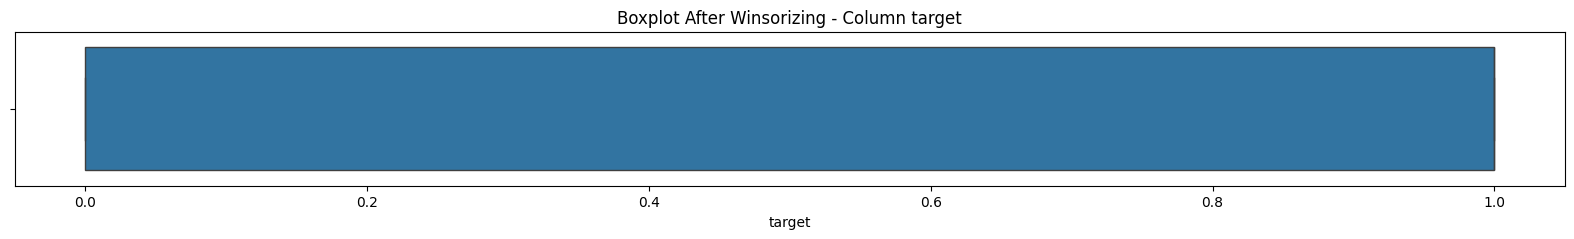

In [7]:
#Menangani outlier dengan winsorize
#Winsorizing dan visualisasi untuk setiap kolom dengan outlier
for kol in df.columns:
    q1 = df[kol].quantile(0.25)
    q3 = df[kol].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    #Hitung proporsi nilai ekstrem
    lower_limit = (df[kol] < lower_bound).mean()
    upper_limit = (df[kol] > upper_bound).mean()

    #Menerapkan winsorizing
    from scipy.stats.mstats import winsorize
    df[kol] = winsorize(df[kol], limits=(lower_limit, upper_limit))

    #Visualisasikan hasilnya
    plt.figure(figsize=(20,2))
    sns.boxplot(x=df[kol])
    plt.title(f"Boxplot After Winsorizing - Column {kol}")
    plt.show()

In [8]:
#Standarisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Exploratory Data Analysis

In [9]:
#Menampilkan statistik deskriptif data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-2.622390e-16,3.277987e-16,2.497514e-17,-2.497514e-17,-7.367666e-16,2.497514e-17,0.000000,-8.741299e-17,-4.120898e-16,-1.105150e-15,...,3.558957e-16,9.990056e-17,1.498508e-16,-1.423583e-15,-2.122887e-16,1.873136e-16,2.247763e-16,1.248757e-16,-8.741299e-16,-4.995028e-17
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.126557e+00,-2.285331e+00,-2.074601e+00,-1.626814e+00,-3.185213e+00,-1.697902e+00,-1.178716,-1.294390e+00,-2.869309e+00,-1.972531e+00,...,-2.259270e+00,-1.764626e+00,-1.399869e+00,-2.741385e+00,-1.540226e+00,-1.365716e+00,-1.745063e+00,-2.450028e+00,-1.776656e+00,-1.297676e+00
25%,-7.087972e-01,-7.380411e-01,-7.112108e-01,-7.194077e-01,-7.217287e-01,-7.758689e-01,-0.777726,-7.524335e-01,-7.224974e-01,-7.649719e-01,...,-7.565354e-01,-7.080062e-01,-7.044205e-01,-7.003330e-01,-7.137219e-01,-7.832800e-01,-7.563999e-01,-6.933869e-01,-7.449672e-01,-1.297676e+00
50%,-2.070683e-01,-9.852672e-02,-2.302441e-01,-2.906191e-01,-2.809810e-02,-2.148336e-01,-0.343909,-4.004690e-01,-5.809947e-02,-1.658727e-01,...,-3.834127e-02,-2.831636e-01,-3.437396e-01,-3.990012e-02,-2.677641e-01,-2.125436e-01,-2.234689e-01,-9.848601e-02,-2.058754e-01,7.706085e-01
75%,5.169836e-01,6.104481e-01,5.457329e-01,4.686121e-01,6.604216e-01,5.498833e-01,0.594267,6.802409e-01,5.755749e-01,5.486780e-01,...,6.765356e-01,5.865880e-01,4.937057e-01,6.205328e-01,6.089877e-01,5.820108e-01,7.125100e-01,5.693744e-01,5.506123e-01,7.706085e-01
max,2.310589e+00,2.567314e+00,2.422676e+00,2.249658e+00,2.719409e+00,2.552279e+00,2.633129,2.761608e+00,2.503481e+00,2.512912e+00,...,2.688474e+00,2.511705e+00,2.282363e+00,2.520962e+00,2.805003e+00,2.564836e+00,2.685877e+00,2.393363e+00,2.455654e+00,7.706085e-01


In [10]:
#Memeriksa nilai unik dalam variabel target
df_y.unique()

array([0, 1])

In [11]:
#Memeriksa banyaknya nilai unik dalam variabel target
df_y.value_counts()

,count
target,
1,357
0,212


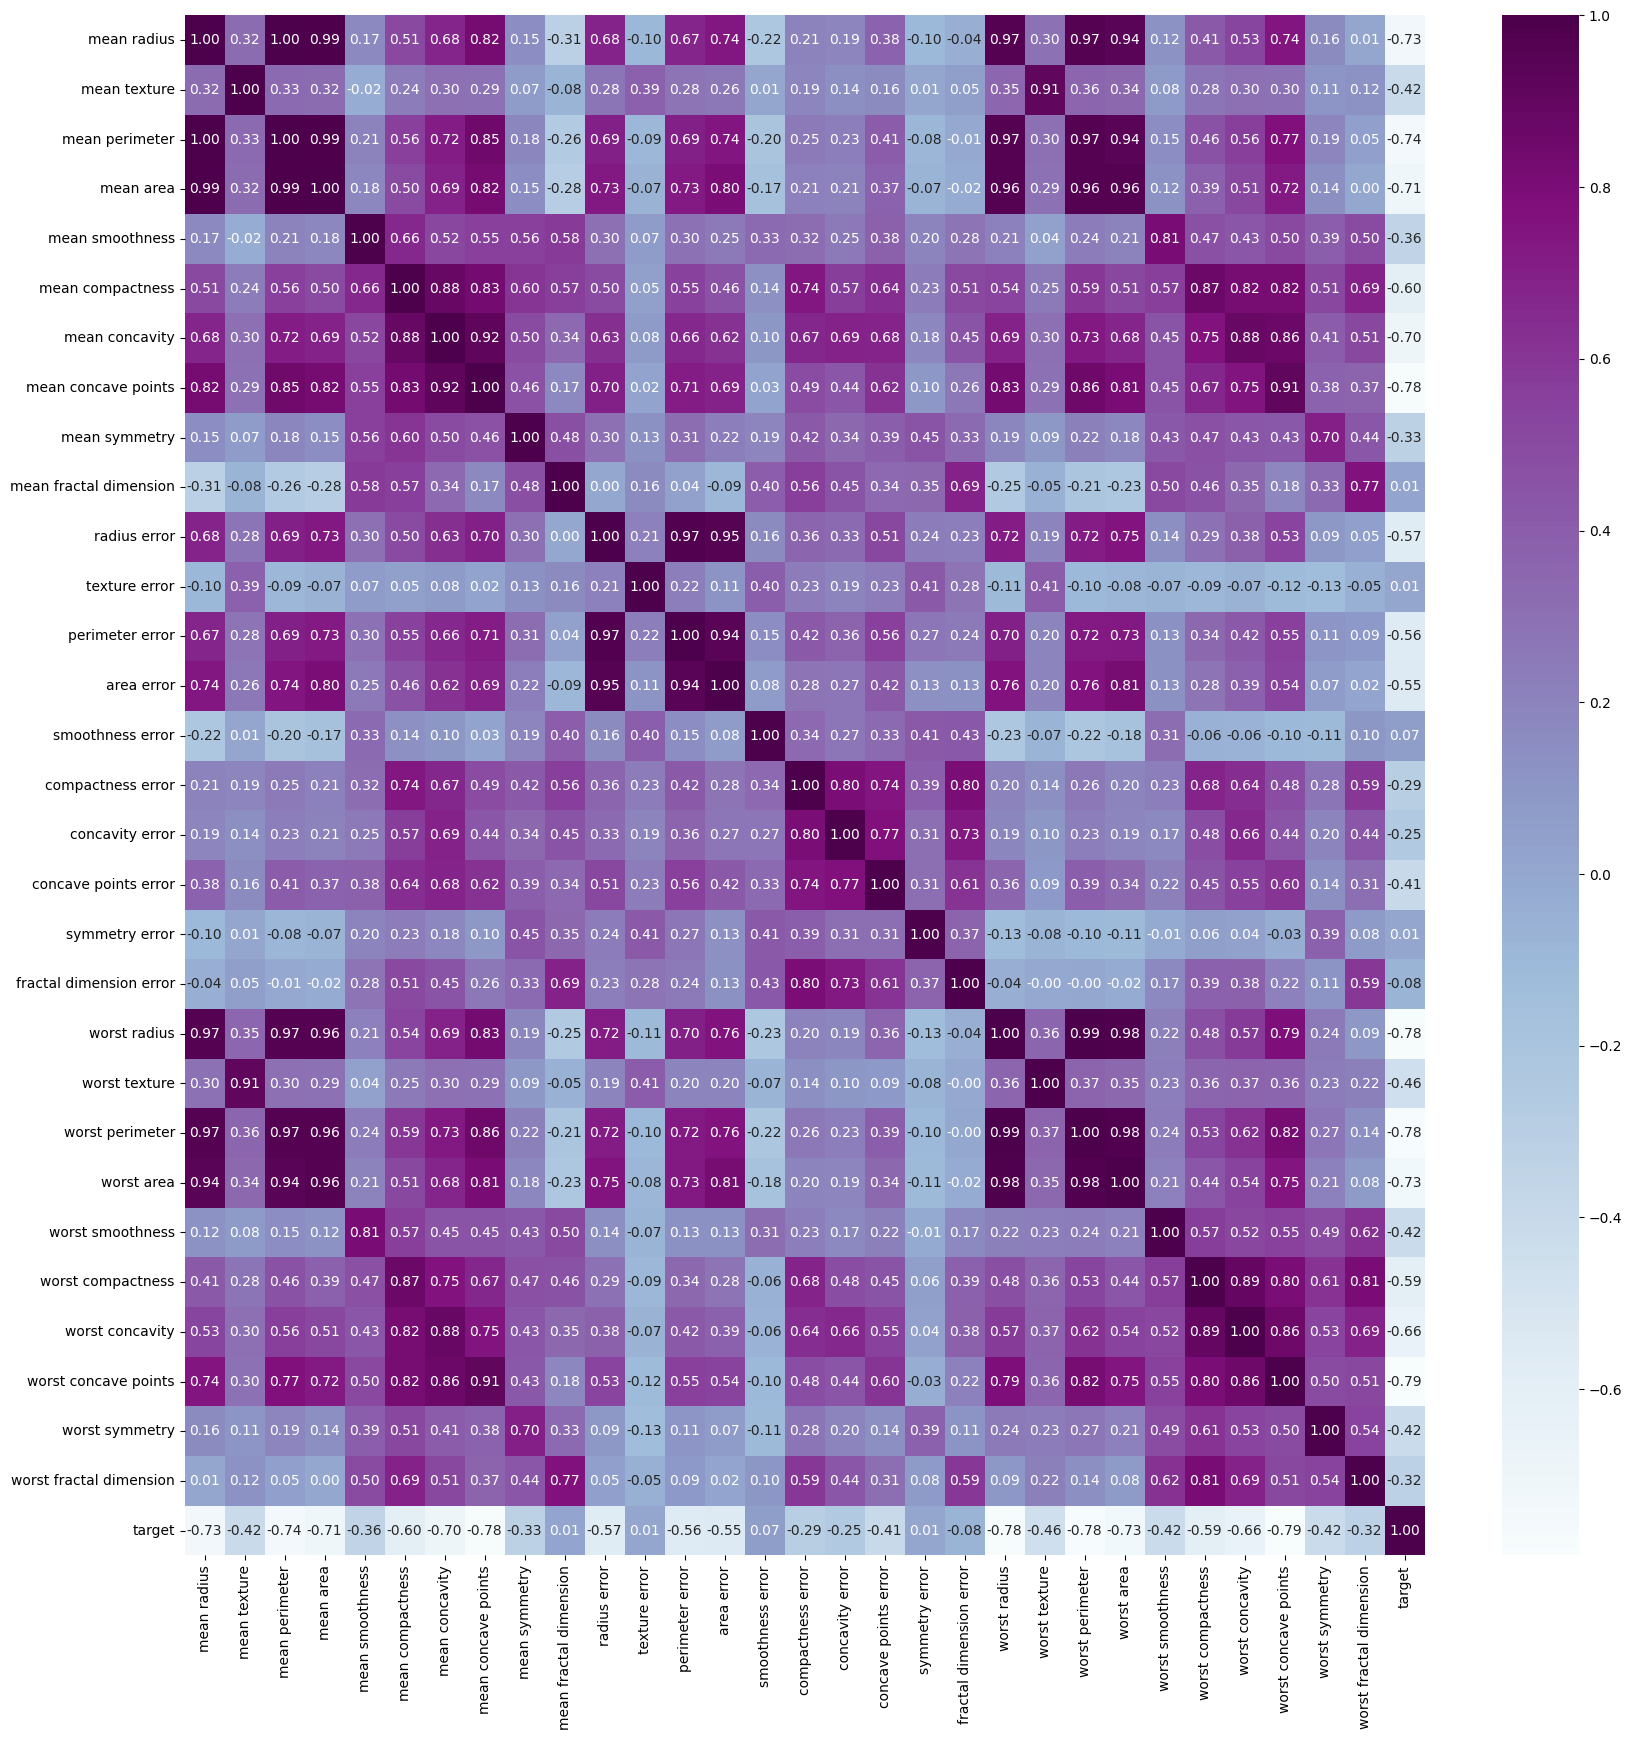

In [12]:
#Membuat heatmap korelasi data
df = pd.concat([df_x, df_y], axis=1)
korelasi = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(korelasi, annot=True, cmap='BuPu', fmt='.2f')
plt.show()

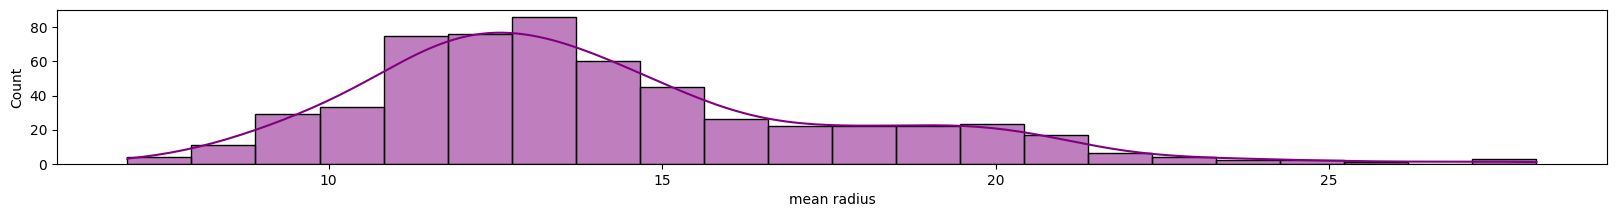

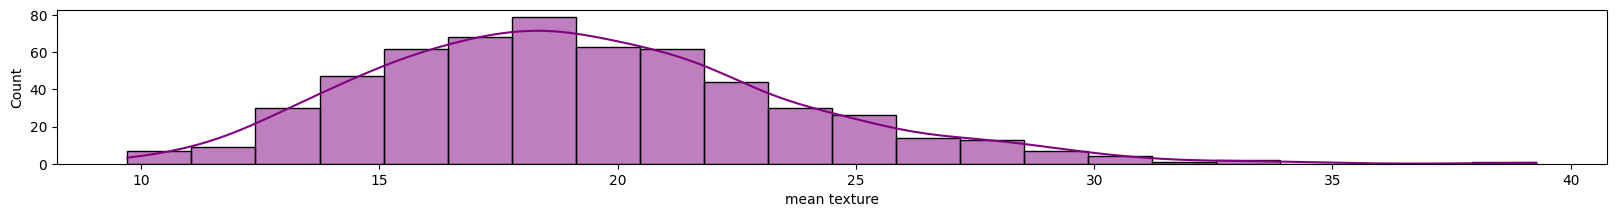

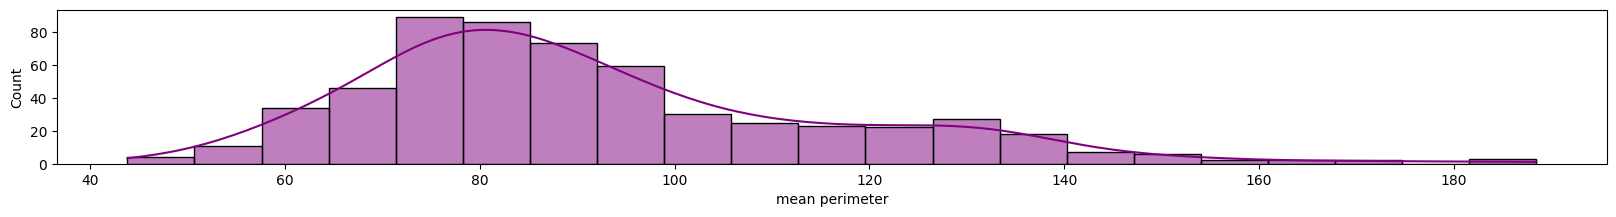

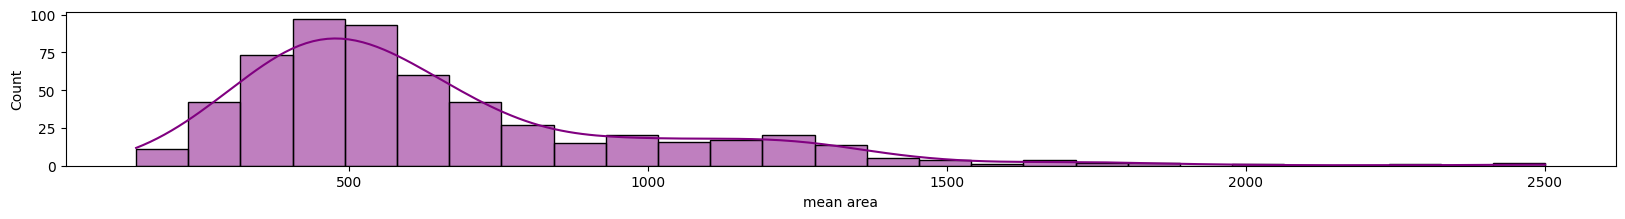

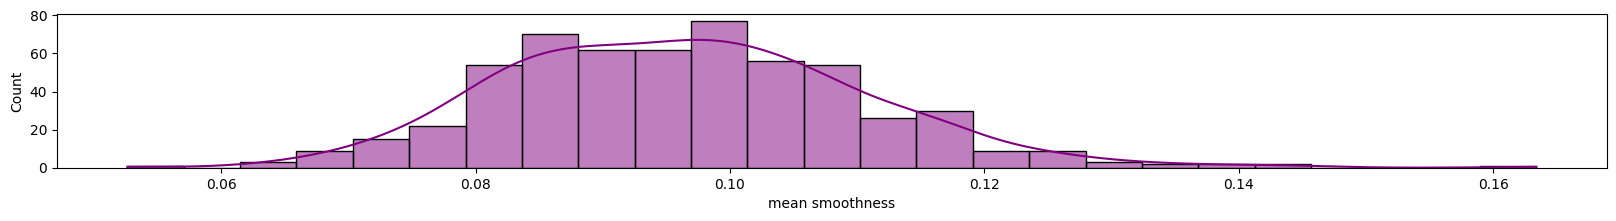

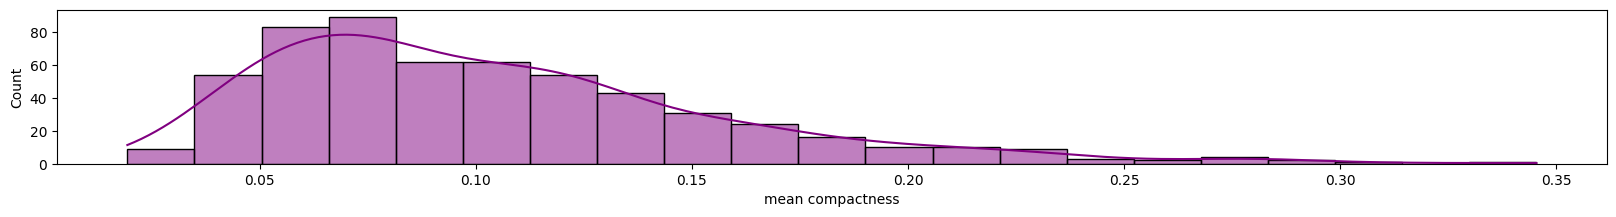

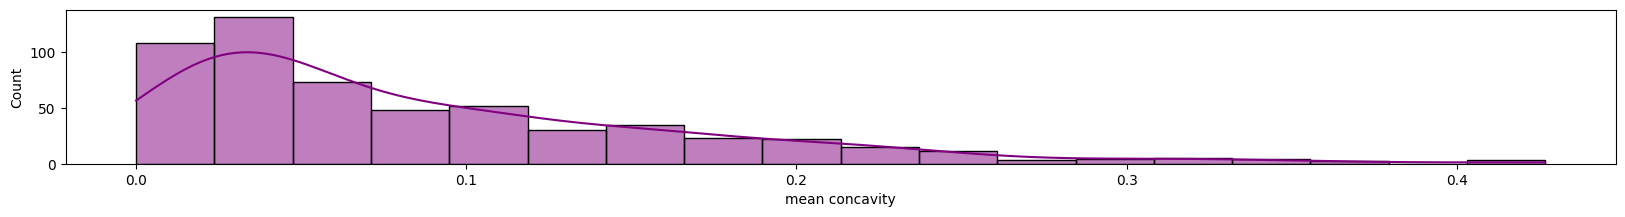

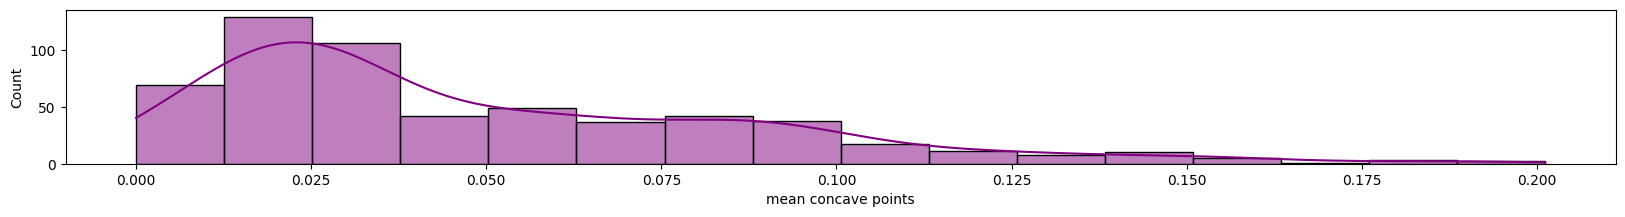

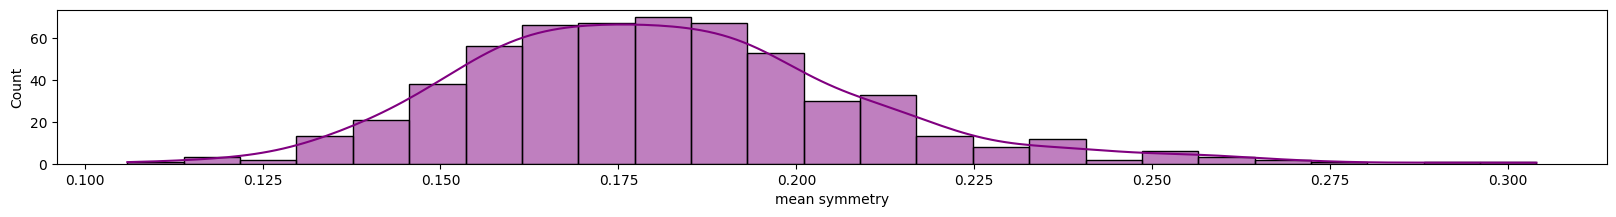

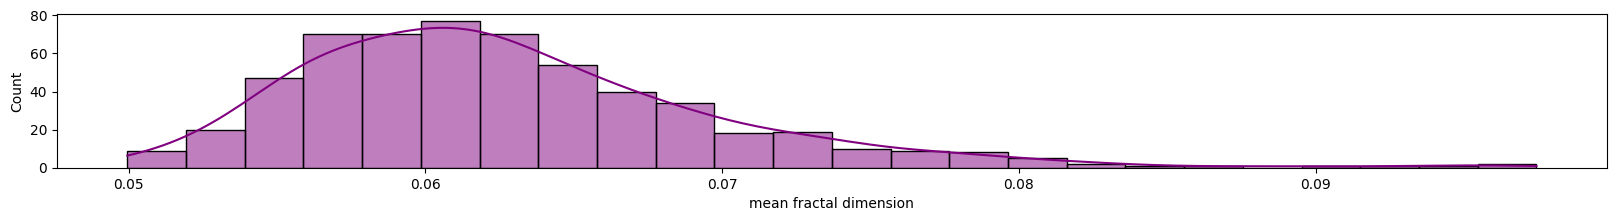

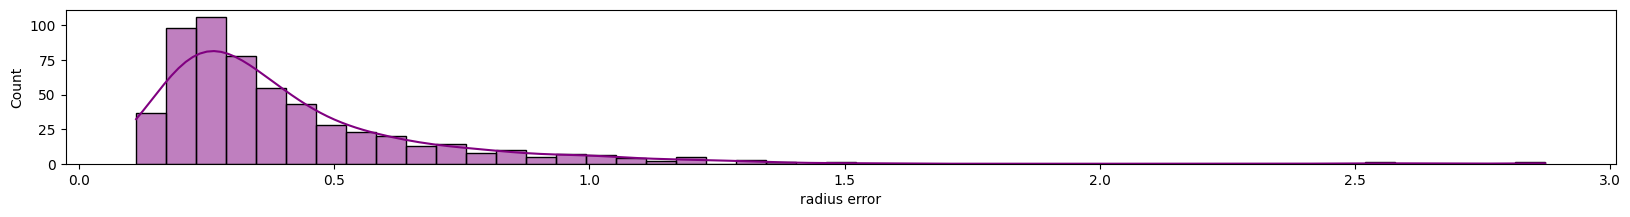

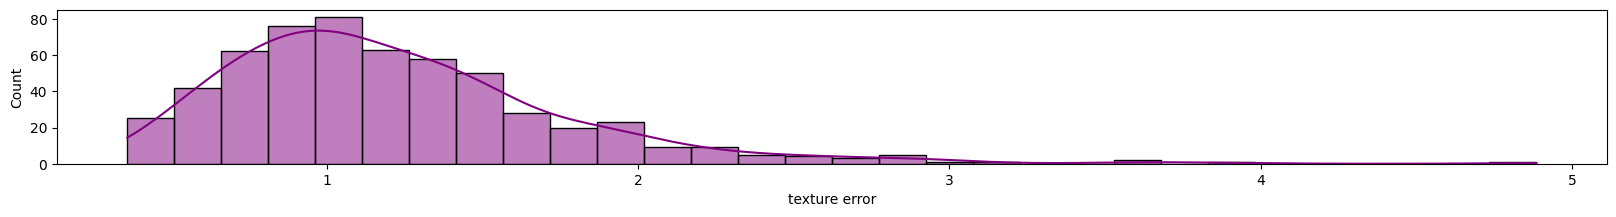

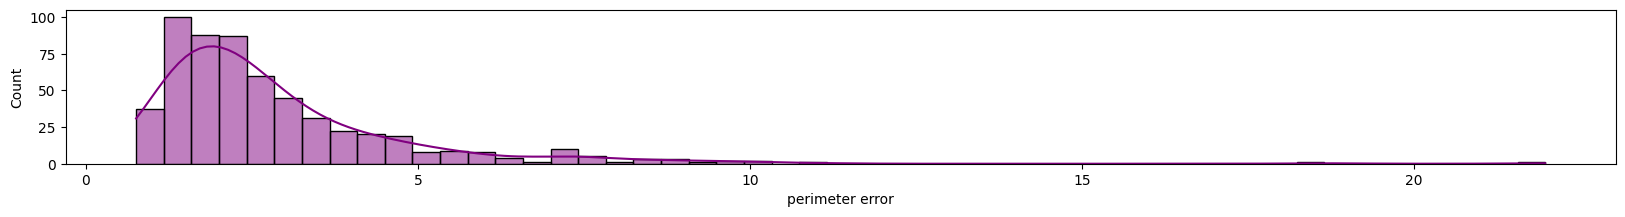

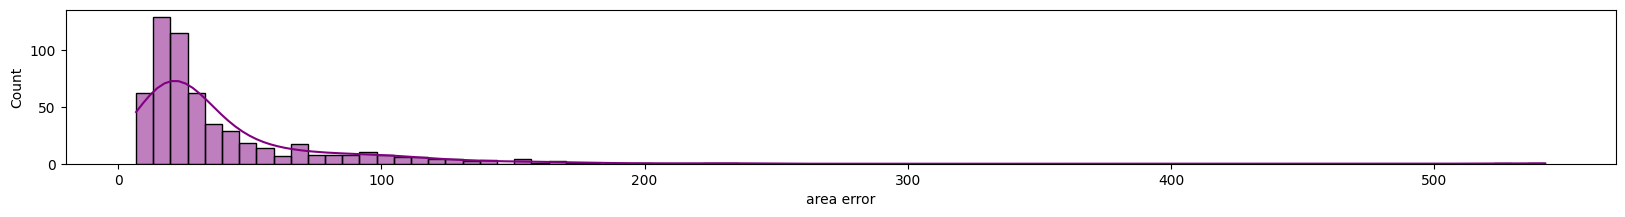

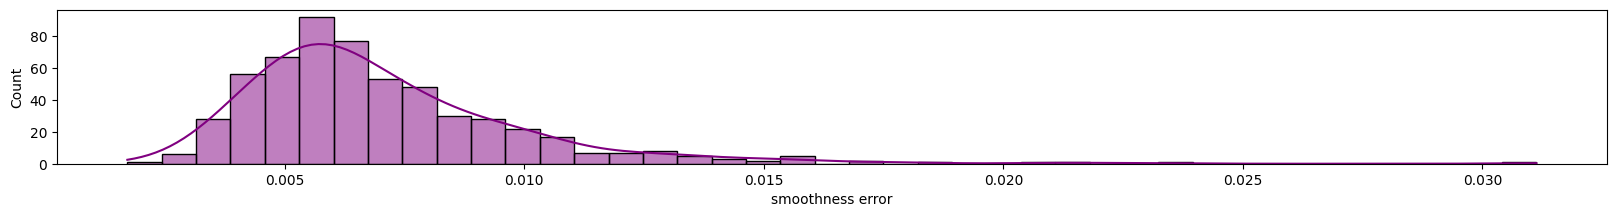

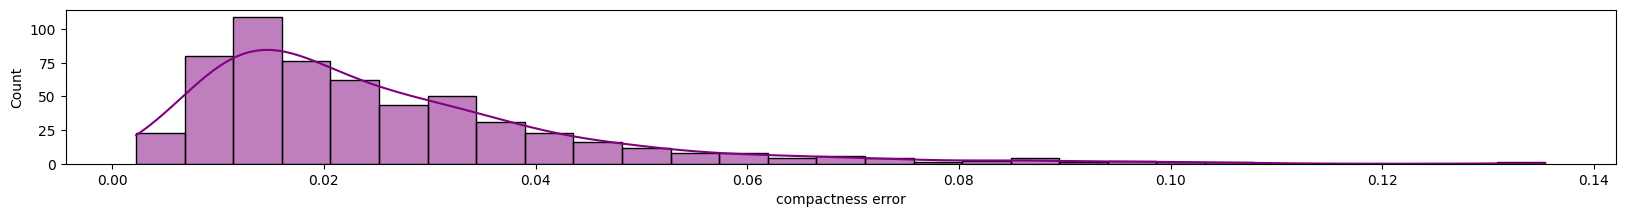

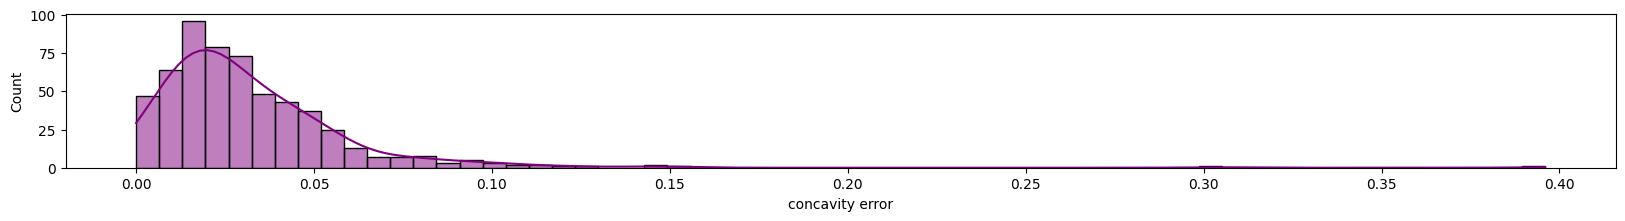

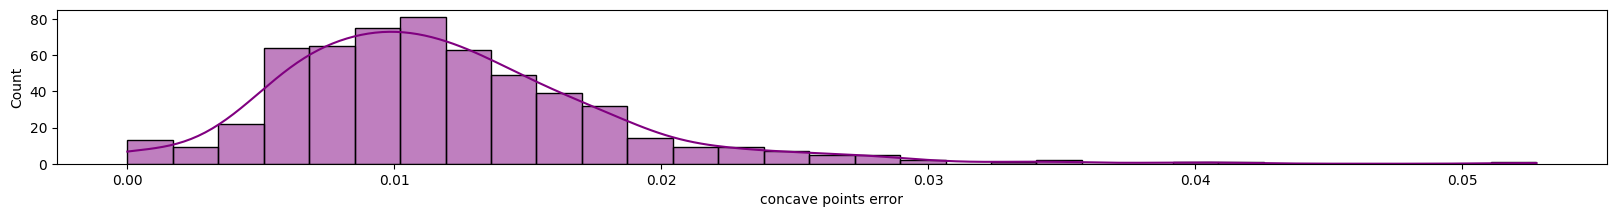

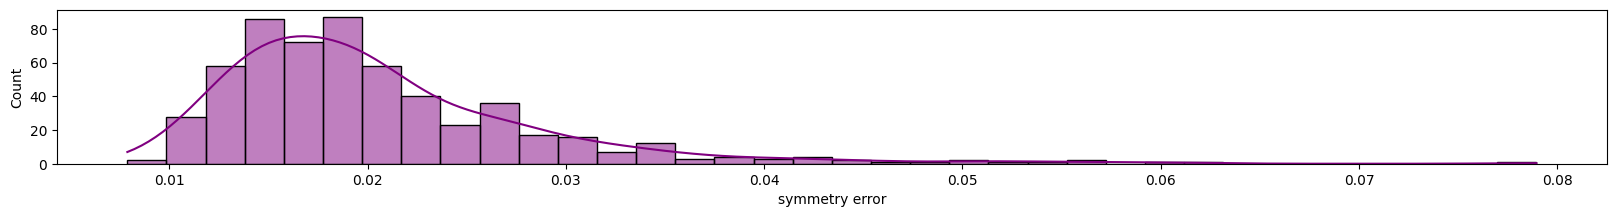

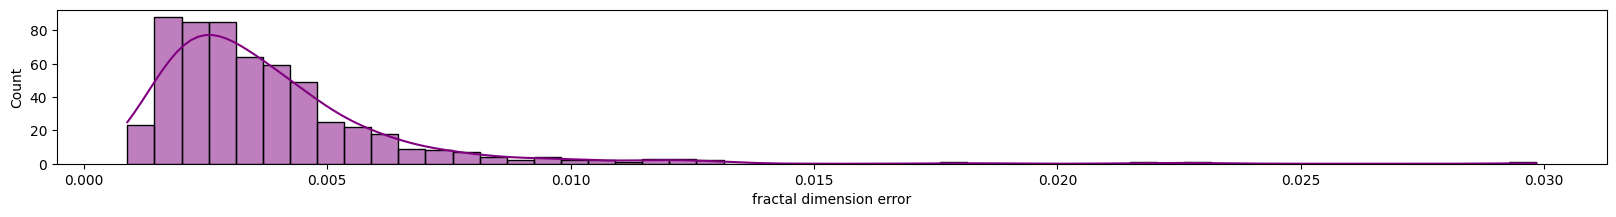

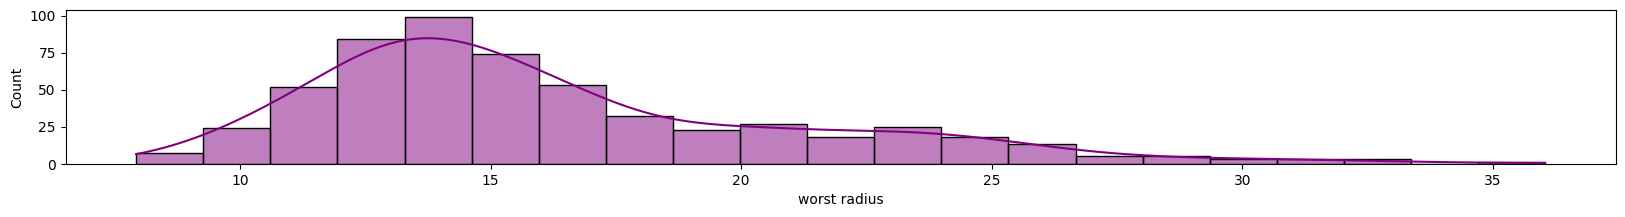

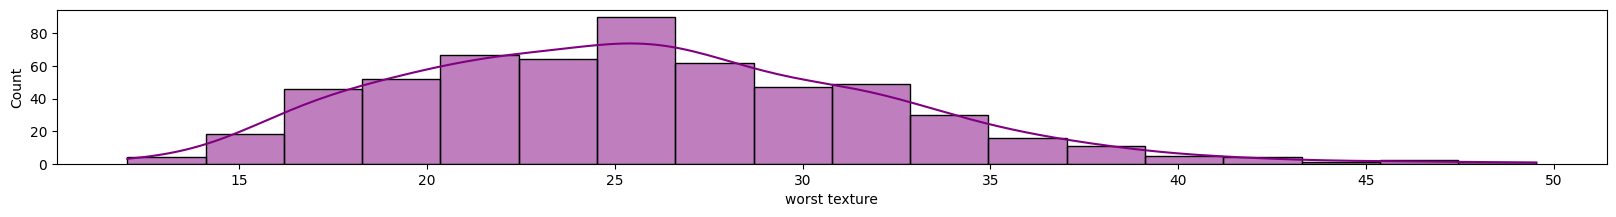

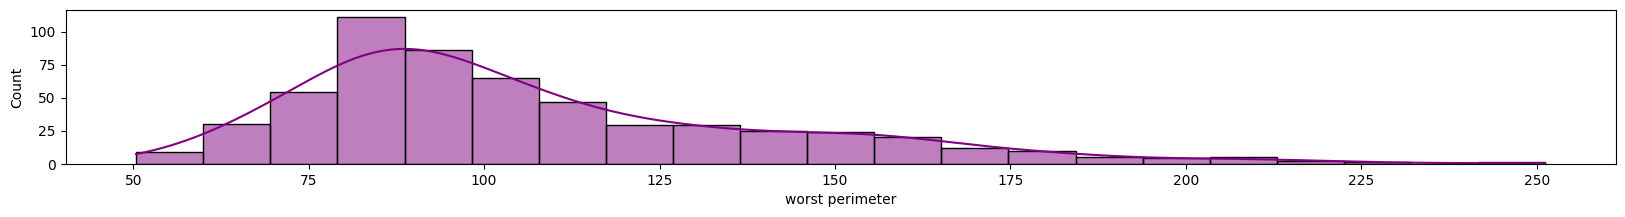

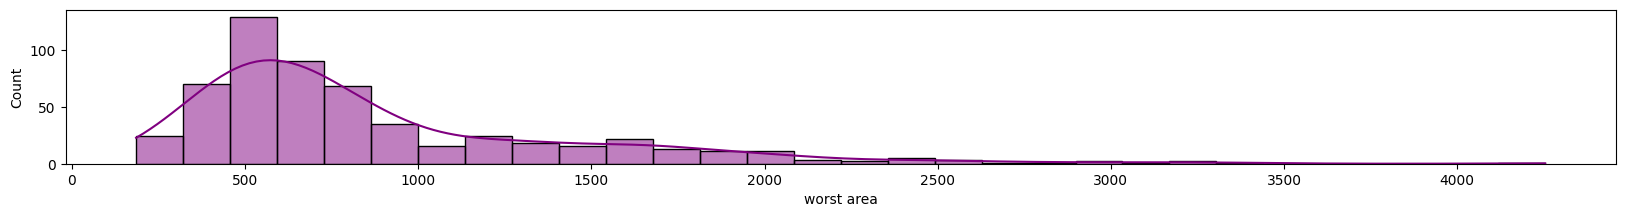

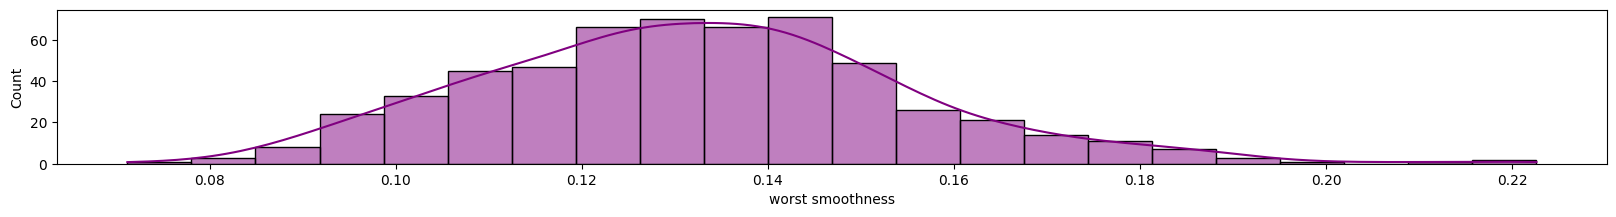

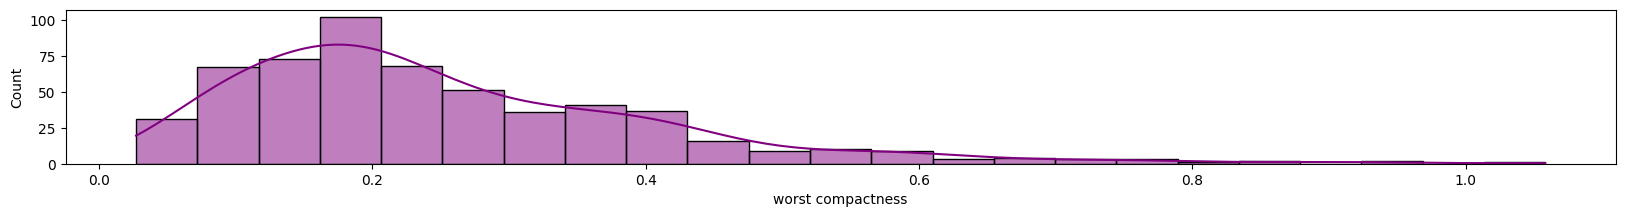

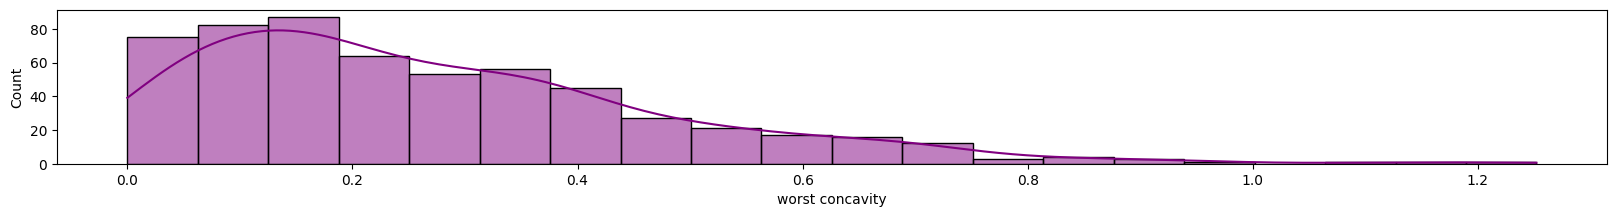

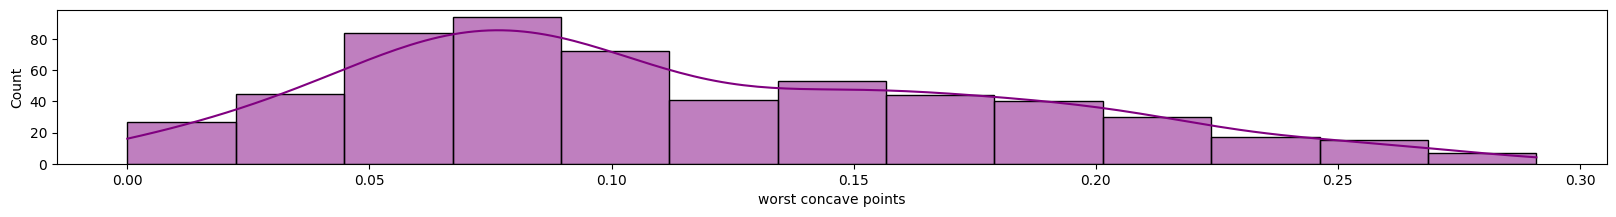

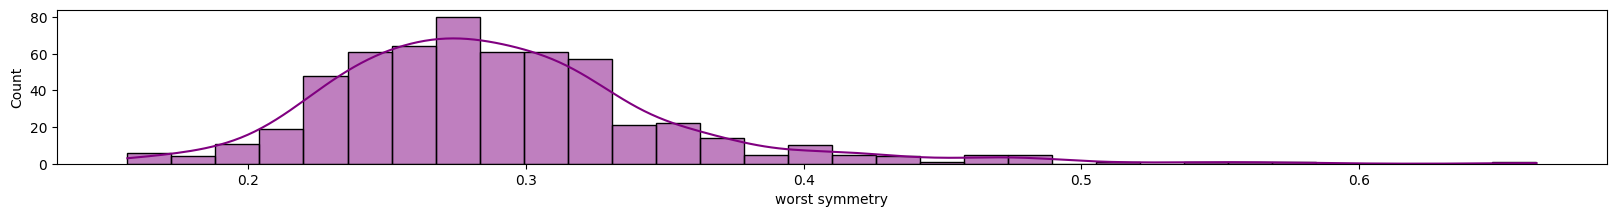

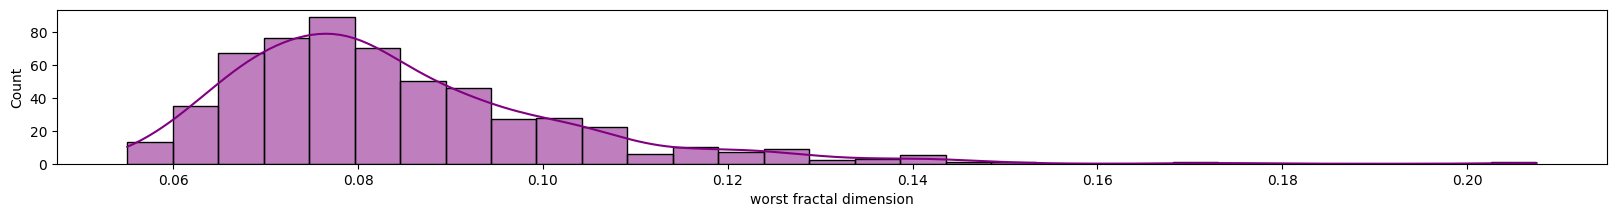

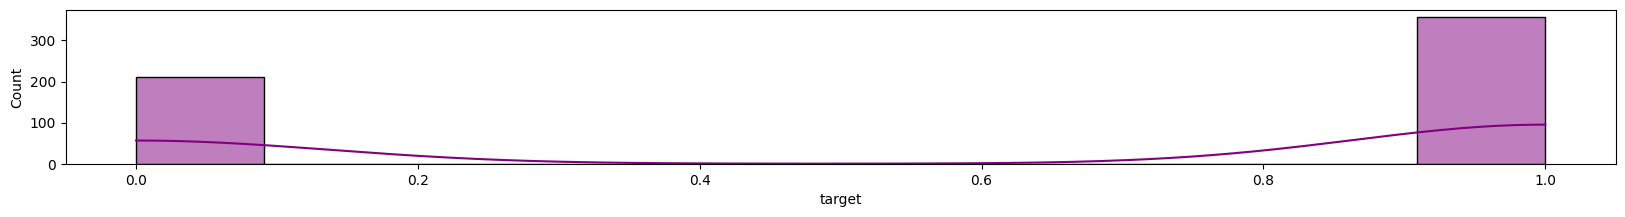

In [13]:
#Melihat distribusi data
for kol in df :
    plt.figure(figsize=(20,2))
    sns.histplot(data=df, x=kol, color='purple', kde=True)
    plt.show()

# Modelling

In [14]:
#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
ypred_DT = DT.predict(x_test)
ypred_DT

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
ypred_RF = RF.predict(x_test)
ypred_RF

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42, max_iter=500)
LR.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [20]:
ypred_LR = LR.predict(x_test)
ypred_LR

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [22]:
ypred_NB = NB.predict(x_test)
ypred_NB

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

# Model Evaluation

In [23]:
#Akurasi model
from sklearn.metrics import accuracy_score
accuracyDT = accuracy_score(y_test, ypred_DT)
accuracyRF = accuracy_score(y_test, ypred_RF)
accuracyLR = accuracy_score(y_test, ypred_LR)
accuracyNB = accuracy_score(y_test, ypred_NB)

print(f"Akurasi Model Decision Tree: {accuracyDT * 100:.2f}%")
print(f"Akurasi Model Random Forest: {accuracyRF * 100:.2f}%")
print(f"Akurasi Model Logistic Regression: {accuracyLR * 100:.2f}%")
print(f"Akurasi Model Naive Bayes: {accuracyNB * 100:.2f}%")

Akurasi Model Decision Tree: 94.74%
Akurasi Model Random Forest: 96.49%
Akurasi Model Logistic Regression: 95.61%
Akurasi Model Naive Bayes: 97.37%


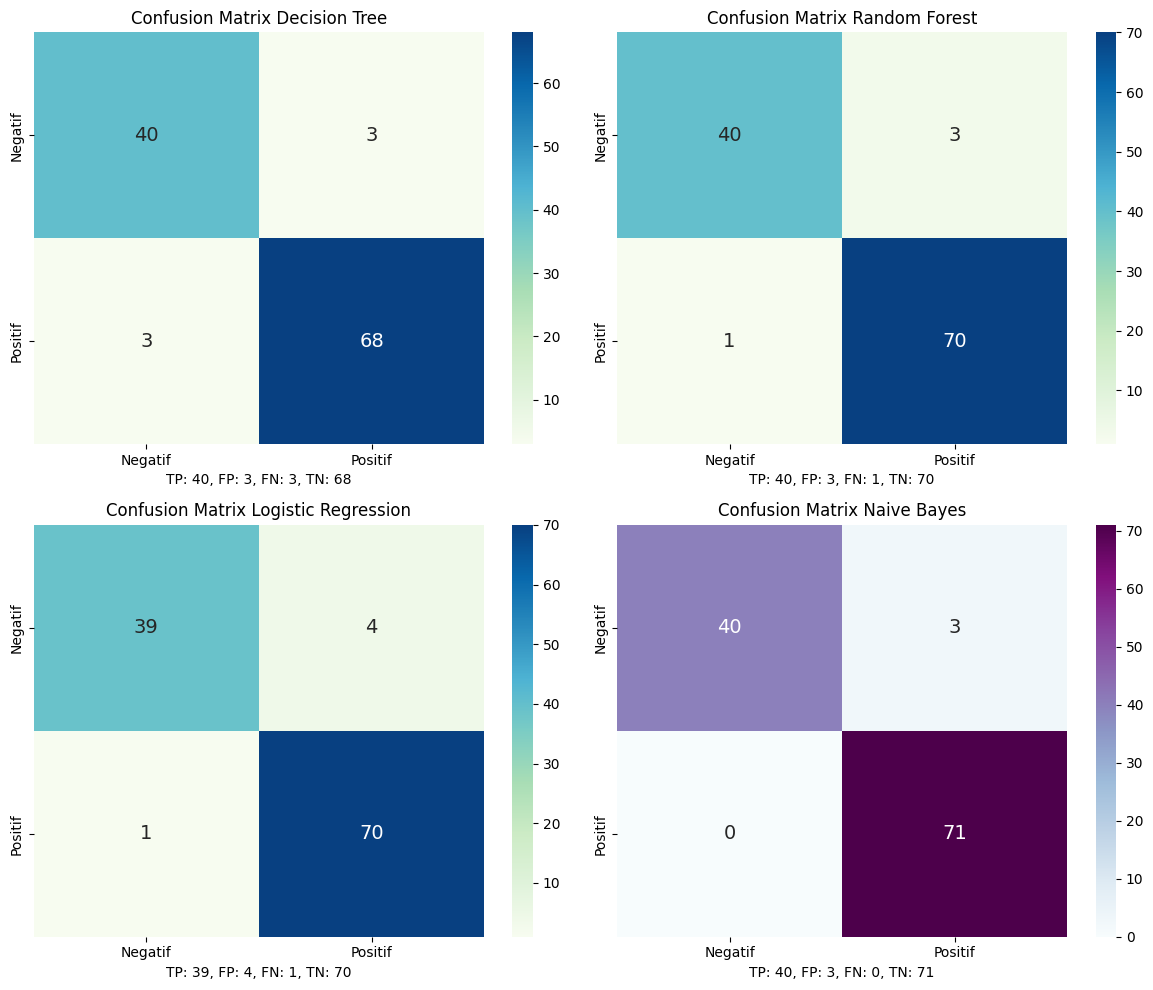

In [24]:
#Visualisasi confusion matrix
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion matrix model decision tree
cf_DT = confusion_matrix(y_test, ypred_DT)
TP_DT, FP_DT, FN_DT, TN_DT = cf_DT.ravel()
sns.heatmap(cf_DT, annot=True, fmt="d", cmap="GnBu", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=axes[0, 0], annot_kws={"size": 14})
axes[0, 0].set_title('Confusion Matrix Decision Tree')
axes[0, 0].set_xlabel(f'TP: {TP_DT}, FP: {FP_DT}, FN: {FN_DT}, TN: {TN_DT}')

# Confusion matrix model random forest
cf_RF = confusion_matrix(y_test, ypred_RF)
TP_RF, FP_RF, FN_RF, TN_RF = cf_RF.ravel()
sns.heatmap(cf_RF, annot=True, fmt="d", cmap="GnBu", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=axes[0, 1], annot_kws={"size": 14})
axes[0, 1].set_title('Confusion Matrix Random Forest')
axes[0, 1].set_xlabel(f'TP: {TP_RF}, FP: {FP_RF}, FN: {FN_RF}, TN: {TN_RF}')

# Confusion matrix model logistic regression
cf_LR = confusion_matrix(y_test, ypred_LR)
TP_LR, FP_LR, FN_LR, TN_LR = cf_LR.ravel()
sns.heatmap(cf_LR, annot=True, fmt="d", cmap="GnBu", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=axes[1, 0], annot_kws={"size": 14})
axes[1, 0].set_title('Confusion Matrix Logistic Regression')
axes[1, 0].set_xlabel(f'TP: {TP_LR}, FP: {FP_LR}, FN: {FN_LR}, TN: {TN_LR}')

# Confusion matrix model naive bayes
cf_NB = confusion_matrix(y_test, ypred_NB)
TP_NB, FP_NB, FN_NB, TN_NB = cf_NB.ravel()
sns.heatmap(cf_NB, annot=True, fmt="d", cmap="BuPu", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=axes[1, 1], annot_kws={"size": 14})
axes[1, 1].set_title('Confusion Matrix Naive Bayes')
axes[1, 1].set_xlabel(f'TP: {TP_NB}, FP: {FP_NB}, FN: {FN_NB}, TN: {TN_NB}')

# Display all plots in one figure
plt.tight_layout()
plt.show()